In [3]:
from turtle import done
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path (relative to project)
file_name = "logs_gemini/gemini_constrained_20251224_121525_metrics.csv"

# Load data
df = pd.read_csv(file_name)

print(f"Loaded {len(df)} rows")
print(f"Columns: {list(df.columns)}")

Loaded 150 rows
Columns: ['DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini']


In [4]:
# Correlation analysis
metrics = ['P', 'Hf', 'Hb', 'Delta', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift']

print("Correlations with judge score:")
print("-" * 40)
for m in metrics:
    corr = df[m].corr(df['score_gemini'])
    print(f"{m:25} r = {corr:.3f}")

Correlations with judge score:
----------------------------------------
P                         r = -0.208
Hf                        r = 0.265
Hb                        r = 0.144
Delta                     r = -0.137
cosine_sim                r = -0.132
adjacent_coherence        r = -0.262
cumulative_drift          r = 0.062


In [5]:
# Full correlation matrix
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_SA_Sprime', 'MI_S_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini']

corr_matrix = df[metrics].corr()

print("Full correlation matrix:")
print(corr_matrix.round(3))

Full correlation matrix:
                        P     Hf     Hb  Delta  MI_SA_Sprime  MI_S_A  \
P                   1.000  0.020 -0.928  0.924         0.952  -0.075   
Hf                  0.020  1.000 -0.234  0.256        -0.036   0.157   
Hb                 -0.928 -0.234  1.000 -1.000        -0.845  -0.008   
Delta               0.924  0.256 -1.000  1.000         0.840   0.012   
MI_SA_Sprime        0.952 -0.036 -0.845  0.840         1.000   0.183   
MI_S_A             -0.075  0.157 -0.008  0.012         0.183   1.000   
cosine_sim          0.414 -0.009 -0.341  0.339         0.427   0.002   
adjacent_coherence  0.360 -0.383 -0.199  0.189         0.338  -0.253   
cumulative_drift   -0.264  0.361 -0.003  0.011        -0.438  -0.244   
score_gemini       -0.208  0.265  0.144 -0.137        -0.185   0.145   

                    cosine_sim  adjacent_coherence  cumulative_drift  \
P                        0.414               0.360            -0.264   
Hf                      -0.009        

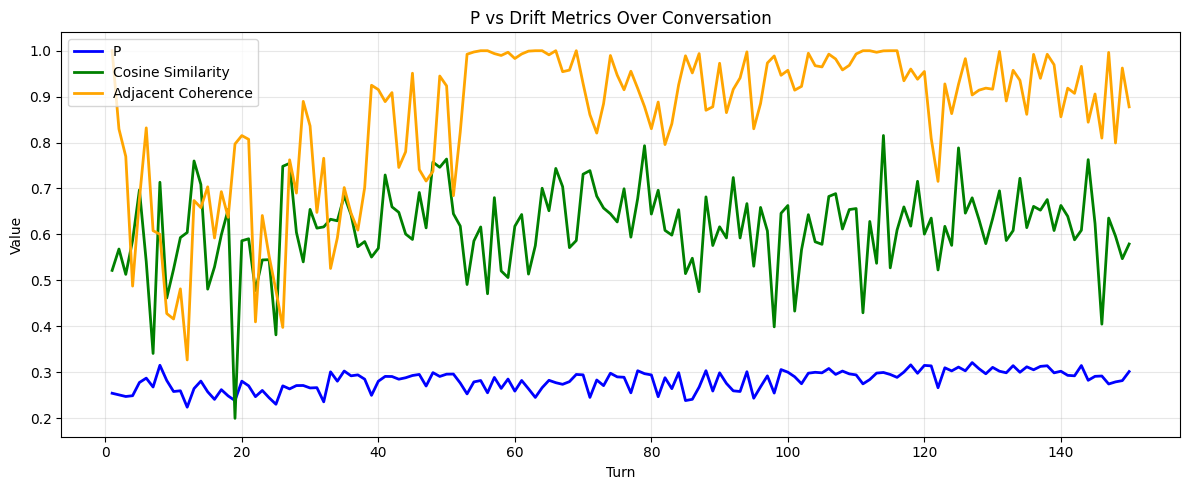

In [6]:
# Visual 1: P vs Drift Metrics over turns
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df['Turn'], df['P'], label='P', linewidth=2, color='blue')
ax.plot(df['Turn'], df['cosine_sim'], label='Cosine Similarity', linewidth=2, color='green')
ax.plot(df['Turn'], df['adjacent_coherence'], label='Adjacent Coherence', linewidth=2, color='orange')

ax.set_xlabel('Turn')
ax.set_ylabel('Value')
ax.set_title('P vs Drift Metrics Over Conversation')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

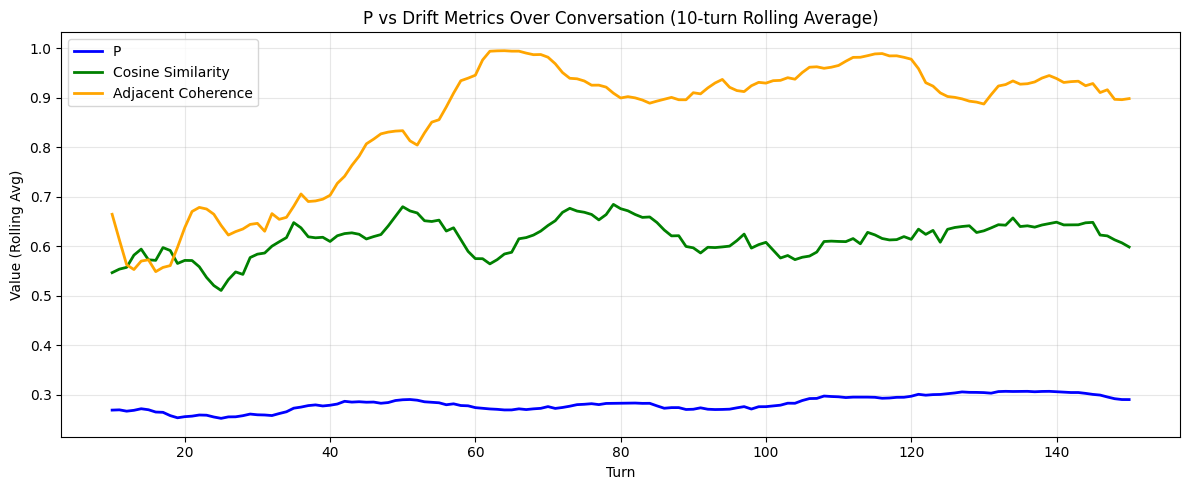

In [7]:
# Visual 1: P vs Drift Metrics (smoothed)
fig, ax = plt.subplots(figsize=(12, 5))

window = 10  # Rolling average window

ax.plot(df['Turn'], df['P'].rolling(window).mean(), label='P', linewidth=2, color='blue')
ax.plot(df['Turn'], df['cosine_sim'].rolling(window).mean(), label='Cosine Similarity', linewidth=2, color='green')
ax.plot(df['Turn'], df['adjacent_coherence'].rolling(window).mean(), label='Adjacent Coherence', linewidth=2, color='orange')

ax.set_xlabel('Turn')
ax.set_ylabel('Value (Rolling Avg)')
ax.set_title('P vs Drift Metrics Over Conversation (10-turn Rolling Average)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

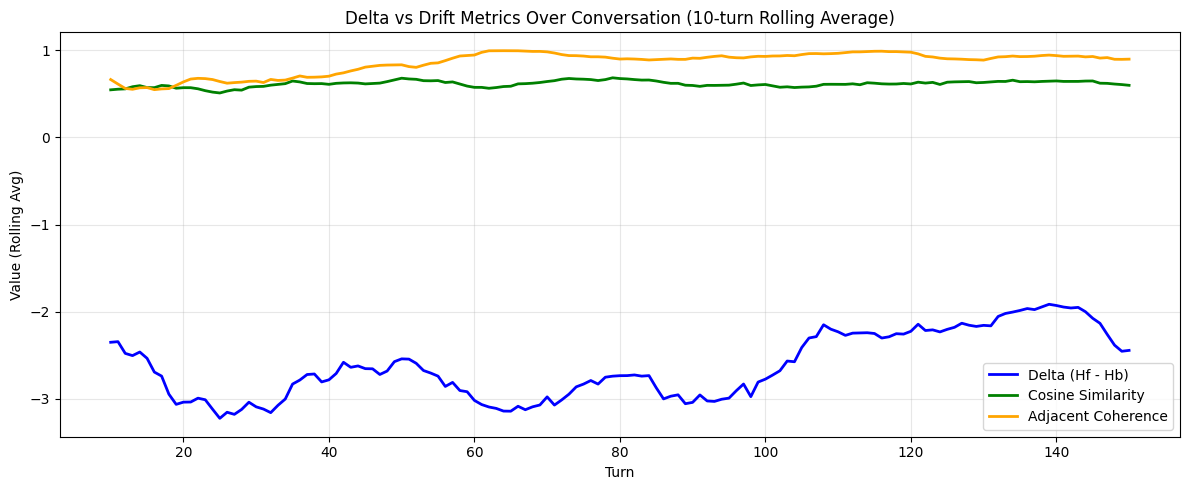

In [8]:
# Visual 2: Delta vs Drift Metrics (smoothed)
fig, ax = plt.subplots(figsize=(12, 5))

window = 10  # Rolling average window

ax.plot(df['Turn'], df['Delta'].rolling(window).mean(), label='Delta (Hf - Hb)', linewidth=2, color='blue')
ax.plot(df['Turn'], df['cosine_sim'].rolling(window).mean(), label='Cosine Similarity', linewidth=2, color='green')
ax.plot(df['Turn'], df['adjacent_coherence'].rolling(window).mean(), label='Adjacent Coherence', linewidth=2, color='orange')

ax.set_xlabel('Turn')
ax.set_ylabel('Value (Rolling Avg)')
ax.set_title('Delta vs Drift Metrics Over Conversation (10-turn Rolling Average)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Correlation between drift metrics and judge score
drift_metrics = ['cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini']

drift_corr = df[drift_metrics].corr()

print("Drift Metrics vs Judge Score Correlation:")
print(drift_corr.round(3))

Drift Metrics vs Judge Score Correlation:
                    cosine_sim  adjacent_coherence  cumulative_drift  \
cosine_sim               1.000               0.130            -0.138   
adjacent_coherence       0.130               1.000            -0.260   
cumulative_drift        -0.138              -0.260             1.000   
score_gemini            -0.132              -0.262             0.062   

                    score_gemini  
cosine_sim                -0.132  
adjacent_coherence        -0.262  
cumulative_drift           0.062  
score_gemini               1.000  


In [12]:
# Load Claude constrained file
file_claude = "logs_claude/all_metrics_claude_constrained_20251224_130545_metrics.csv"
df_claude = pd.read_csv(file_claude)

print(f"Loaded {len(df_claude)} rows")
print(f"Columns: {list(df_claude.columns)}")

Loaded 150 rows
Columns: ['DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini', 'explanation_gemini']


In [13]:
# Correlation analysis - Claude
metrics = ['P', 'Hf', 'Hb', 'Delta', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini']

print("Correlations with judge score (Claude constrained):")
print("-" * 50)
for m in metrics:
    corr = df_claude[m].corr(df_claude['score_gemini'])
    print(f"{m:25} r = {corr:.3f}")

Correlations with judge score (Claude constrained):
--------------------------------------------------
P                         r = -0.105
Hf                        r = 0.024
Hb                        r = 0.061
Delta                     r = -0.060
cosine_sim                r = -0.110
adjacent_coherence        r = 0.010
cumulative_drift          r = 0.070
score_gemini              r = 1.000


In [14]:
# Full correlation matrix
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_SA_Sprime', 'MI_S_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini']

corr_matrix = df[metrics].corr()

print("Full correlation matrix:")
print(corr_matrix.round(3))

Full correlation matrix:
                        P     Hf     Hb  Delta  MI_SA_Sprime  MI_S_A  \
P                   1.000  0.020 -0.928  0.924         0.952  -0.075   
Hf                  0.020  1.000 -0.234  0.256        -0.036   0.157   
Hb                 -0.928 -0.234  1.000 -1.000        -0.845  -0.008   
Delta               0.924  0.256 -1.000  1.000         0.840   0.012   
MI_SA_Sprime        0.952 -0.036 -0.845  0.840         1.000   0.183   
MI_S_A             -0.075  0.157 -0.008  0.012         0.183   1.000   
cosine_sim          0.414 -0.009 -0.341  0.339         0.427   0.002   
adjacent_coherence  0.360 -0.383 -0.199  0.189         0.338  -0.253   
cumulative_drift   -0.264  0.361 -0.003  0.011        -0.438  -0.244   
score_gemini       -0.208  0.265  0.144 -0.137        -0.185   0.145   

                    cosine_sim  adjacent_coherence  cumulative_drift  \
P                        0.414               0.360            -0.264   
Hf                      -0.009        

In [20]:
# Load combined file
file_combined = "logs_claude/all_metrics_claude_gemini.csv"
df_all = pd.read_csv(file_combined)

print(f"Loaded {len(df_all)} rows")
print(f"Unique teachers: {df_all['teacher'].unique()}")
print(f"Rows per teacher: {df_all['teacher'].value_counts()}")

Loaded 300 rows
Unique teachers: ['claude' 'gemini']
Rows per teacher: teacher
claude    150
gemini    150
Name: count, dtype: int64


In [22]:
# Correlation analysis by teacher
metrics = ['P', 'Hf', 'Hb', 'Delta', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_gemini']

for teacher in df_all['teacher'].unique():
    df_teacher = df_all[df_all['teacher'] == teacher]
    print(f"\n{'='*50}")
    print(f"teacher: {teacher} ({len(df_teacher)} rows)")
    print(f"{'='*50}")
    print("Correlations with judge score:")
    for m in metrics:
        corr = df_teacher[m].corr(df_teacher['score_gemini'])
        print(f"{m:25} r = {corr:.3f}")


teacher: claude (150 rows)
Correlations with judge score:
P                         r = -0.105
Hf                        r = 0.024
Hb                        r = 0.061
Delta                     r = -0.060
cosine_sim                r = -0.110
adjacent_coherence        r = 0.010
cumulative_drift          r = 0.070
score_gemini              r = 1.000

teacher: gemini (150 rows)
Correlations with judge score:
P                         r = -0.208
Hf                        r = 0.265
Hb                        r = 0.144
Delta                     r = -0.137
cosine_sim                r = -0.132
adjacent_coherence        r = -0.262
cumulative_drift          r = 0.062
score_gemini              r = 1.000


In [23]:
# P correlation with drift metrics by teacher
drift_metrics = ['cosine_sim', 'adjacent_coherence', 'cumulative_drift']

for teacher in df_all['teacher'].unique():
    df_teacher = df_all[df_all['teacher'] == teacher]
    print(f"\n{'='*50}")
    print(f"teacher: {teacher}")
    print(f"{'='*50}")
    print("P correlations with drift metrics:")
    for m in drift_metrics:
        corr = df_teacher['P'].corr(df_teacher[m])
        print(f"P vs {m:25} r = {corr:.3f}")


teacher: claude
P correlations with drift metrics:
P vs cosine_sim                r = 0.226
P vs adjacent_coherence        r = 0.281
P vs cumulative_drift          r = -0.094

teacher: gemini
P correlations with drift metrics:
P vs cosine_sim                r = 0.414
P vs adjacent_coherence        r = 0.360
P vs cumulative_drift          r = -0.264


In [24]:
# All P metrics correlation with drift metrics by teacher
p_metrics = ['P', 'Hf', 'Hb', 'Delta']
drift_metrics = ['cosine_sim', 'adjacent_coherence', 'cumulative_drift']

for teacher in df_all['teacher'].unique():
    df_teacher = df_all[df_all['teacher'] == teacher]
    print(f"\n{'='*50}")
    print(f"Teacher: {teacher}")
    print(f"{'='*50}")

    for p in p_metrics:
        print(f"\n{p} correlations:")
        for d in drift_metrics:
            corr = df_teacher[p].corr(df_teacher[d])
            print(f"  vs {d:25} r = {corr:.3f}")


Teacher: claude

P correlations:
  vs cosine_sim                r = 0.226
  vs adjacent_coherence        r = 0.281
  vs cumulative_drift          r = -0.094

Hf correlations:
  vs cosine_sim                r = 0.145
  vs adjacent_coherence        r = -0.359
  vs cumulative_drift          r = 0.424

Hb correlations:
  vs cosine_sim                r = -0.213
  vs adjacent_coherence        r = -0.151
  vs cumulative_drift          r = -0.201

Delta correlations:
  vs cosine_sim                r = 0.214
  vs adjacent_coherence        r = 0.139
  vs cumulative_drift          r = 0.209

Teacher: gemini

P correlations:
  vs cosine_sim                r = 0.414
  vs adjacent_coherence        r = 0.360
  vs cumulative_drift          r = -0.264

Hf correlations:
  vs cosine_sim                r = -0.009
  vs adjacent_coherence        r = -0.383
  vs cumulative_drift          r = 0.361

Hb correlations:
  vs cosine_sim                r = -0.341
  vs adjacent_coherence        r = -0.199
  vs cumu

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
file_path = "Test_Logs/Llama_all_metrics_dec_28.csv"  # Update with your actual file name
df = pd.read_csv(file_path)

print(f"Total rows: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nUnique teachers: {df['teacher'].unique()}")
print(f"Unique conditions: {df['condition'].unique()}")
print(f"Unique tests: {df['test'].unique()}")
print(f"\nRows per condition:")
print(df['condition'].value_counts())
print(f"\nRows per teacher:")
print(df['teacher'].value_counts())

Total rows: 3232

Columns: ['UID', 'teacher', 'condition', 'test', 'DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'Unnamed: 23', 'Prompt', 'Response', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai', 'explanation_openai', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']

Unique teachers: ['chatgpt' 'claude' 'gemini']
Unique conditions: ['constrained' 'normal']
Unique tests: [1 2 3 6 4]

Rows per condition:
condition
normal         1785
constrained    1447
Name: count, dtype: int64

Rows per teacher:
teacher
gemini     1185
claude     1047
chatgpt    1000
Name: count, dtype: int64


In [26]:
# Select numeric metrics for correlation
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_SA_Sprime', 'MI_S_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

# Compute correlation matrix
corr_matrix = df[metrics].corr()

print("Full Correlation Matrix (all 3231 rows):")
print(corr_matrix.round(3))

Full Correlation Matrix (all 3231 rows):
                        P     Hf     Hb  Delta  MI_SA_Sprime  MI_S_A  \
P                   1.000  0.182 -0.888  0.883         0.914  -0.077   
Hf                  0.182  1.000 -0.287  0.331         0.033  -0.146   
Hb                 -0.888 -0.287  1.000 -0.999        -0.822  -0.179   
Delta               0.883  0.331 -0.999  1.000         0.811   0.169   
MI_SA_Sprime        0.914  0.033 -0.822  0.811         1.000   0.267   
MI_S_A             -0.077 -0.146 -0.179  0.169         0.267   1.000   
cosine_sim          0.249  0.026 -0.269  0.266         0.289   0.131   
adjacent_coherence -0.020 -0.196 -0.080  0.069         0.016   0.204   
cumulative_drift    0.014  0.251 -0.080  0.091        -0.076  -0.123   
score_openai        0.080 -0.008 -0.180  0.177         0.297   0.552   

                    cosine_sim  adjacent_coherence  cumulative_drift  \
P                        0.249              -0.020             0.014   
Hf                    

In [27]:
# Save correlation matrix to CSV
corr_matrix.to_csv('correlation_matrix_full.csv')
print("Saved to: correlation_matrix_full.csv")

Saved to: correlation_matrix_full.csv


In [28]:
# Correlation matrix by condition
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_SA_Sprime', 'MI_S_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition]
    corr = df_cond[metrics].corr()
    corr.to_csv(f'correlation_matrix_{condition}.csv')
    print(f"Saved: correlation_matrix_{condition}.csv ({len(df_cond)} rows)")

Saved: correlation_matrix_constrained.csv (1447 rows)
Saved: correlation_matrix_normal.csv (1785 rows)


In [31]:
# Delta comparison between conditions
print("Delta statistics by condition:")
print("=" * 50)

for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition]
    print(f"\n{condition.upper()} ({len(df_cond)} rows):")
    print(f"  Mean:   {df_cond['Delta'].mean():.4f}")
    print(f"  Std:    {df_cond['Delta'].std():.4f}")
    print(f"  Min:    {df_cond['Delta'].min():.4f}")
    print(f"  Max:    {df_cond['Delta'].max():.4f}")
    print(f"  Median: {df_cond['Delta'].median():.4f}")

# Save to CSV
delta_stats = df.groupby('condition')['Delta'].agg(['mean', 'std', 'min', 'max', 'median'])
delta_stats.to_csv('delta_by_condition.csv')
print("\nSaved: delta_by_condition.csv")

Delta statistics by condition:

CONSTRAINED (1447 rows):
  Mean:   -3.1754
  Std:    0.8392
  Min:    -6.7846
  Max:    0.7049
  Median: -3.1479

NORMAL (1785 rows):
  Mean:   -3.0564
  Std:    0.8282
  Min:    -5.1637
  Max:    0.8744
  Median: -3.0203

Saved: delta_by_condition.csv


In [32]:
# All metrics comparison between conditions
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_SA_Sprime', 'MI_S_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

comparison = []

for metric in metrics:
    const_mean = df[df['condition'] == 'constrained'][metric].mean()
    const_std = df[df['condition'] == 'constrained'][metric].std()
    norm_mean = df[df['condition'] == 'normal'][metric].mean()
    norm_std = df[df['condition'] == 'normal'][metric].std()
    diff = norm_mean - const_mean
    diff_pct = (diff / const_mean) * 100 if const_mean != 0 else 0

    comparison.append({
        'metric': metric,
        'constrained_mean': const_mean,
        'constrained_std': const_std,
        'normal_mean': norm_mean,
        'normal_std': norm_std,
        'difference': diff,
        'diff_percent': diff_pct
    })

comp_df = pd.DataFrame(comparison)
comp_df.to_csv('metrics_by_condition.csv', index=False)
print("Saved: metrics_by_condition.csv")

Saved: metrics_by_condition.csv


In [33]:
# Check all entropy components by condition
components = ['H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A']

for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition]
    print(f"\n{condition.upper()}:")
    for comp in components:
        print(f"  {comp}: mean={df_cond[comp].mean():.3f}, std={df_cond[comp].std():.3f}")


CONSTRAINED:
  H_S: mean=8.542, std=0.588
  H_A: mean=5.561, std=0.724
  H_S_prime: mean=5.382, std=0.837
  H_SA: mean=8.557, std=0.514
  H_SAS_prime: mean=8.565, std=0.500
  MI_SA_Sprime: mean=5.373, std=0.832
  MI_S_A: mean=5.546, std=0.734

NORMAL:
  H_S: mean=8.753, std=0.583
  H_A: mean=6.259, std=0.485
  H_S_prime: mean=5.711, std=0.951
  H_SA: mean=8.767, std=0.516
  H_SAS_prime: mean=8.774, std=0.501
  MI_SA_Sprime: mean=5.704, std=0.950
  MI_S_A: mean=6.244, std=0.507


In [34]:
# Check column names
print(df.columns.tolist())

['UID', 'teacher', 'condition', 'test', 'DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'Unnamed: 23', 'Prompt', 'Response', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai', 'explanation_openai', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']


In [35]:
# Raw MI_S_A values
print("MI_S_A sample values:")
print(df['MI_S_A'].head(20))

MI_S_A sample values:
0     2.686711
1     5.124162
2     5.725496
3     5.770555
4     5.728515
5     5.701619
6     5.531520
7     5.708536
8     5.689778
9     5.749129
10    5.693312
11    5.734677
12    5.563938
13    5.854235
14    5.748452
15    5.717216
16    5.523051
17    5.582860
18    5.626084
19    5.875209
Name: MI_S_A, dtype: float64


In [36]:
# Correct comparison
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_SA_Sprime', 'MI_S_A', 'H_S', 'H_A', 'H_S_prime',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

print("METRIC COMPARISON: CONSTRAINED vs NORMAL")
print("=" * 70)
print(f"{'Metric':<20} {'Constrained':>12} {'Normal':>12} {'Diff':>10} {'Diff %':>10}")
print("-" * 70)

for metric in metrics:
    const_mean = df[df['condition'] == 'constrained'][metric].mean()
    norm_mean = df[df['condition'] == 'normal'][metric].mean()
    diff = norm_mean - const_mean
    diff_pct = (diff / const_mean) * 100 if const_mean != 0 else 0
    print(f"{metric:<20} {const_mean:>12.3f} {norm_mean:>12.3f} {diff:>10.3f} {diff_pct:>9.1f}%")

METRIC COMPARISON: CONSTRAINED vs NORMAL
Metric                Constrained       Normal       Diff     Diff %
----------------------------------------------------------------------
P                           0.275        0.274     -0.001      -0.3%
Hf                          0.008        0.007     -0.001     -14.9%
Hb                          3.184        3.063     -0.120      -3.8%
Delta                      -3.175       -3.056      0.119      -3.7%
MI_SA_Sprime                5.373        5.704      0.331       6.2%
MI_S_A                      5.546        6.244      0.698      12.6%
H_S                         8.542        8.753      0.211       2.5%
H_A                         5.561        6.259      0.698      12.5%
H_S_prime                   5.382        5.711      0.329       6.1%
cosine_sim                  0.612        0.644      0.031       5.1%
adjacent_coherence          0.761        0.733     -0.029      -3.8%
cumulative_drift            0.024        0.019     -0.005   

In [37]:
# Correlation between MI_S_A and Delta
print("MI_S_A vs Delta correlation:")
print("=" * 50)

# Overall
corr_all = df['MI_S_A'].corr(df['Delta'])
print(f"Overall: r = {corr_all:.3f}")

# By condition
for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition]
    corr = df_cond['MI_S_A'].corr(df_cond['Delta'])
    print(f"{condition}: r = {corr:.3f}")

# Also check MI_S_A vs Hf and Hb separately
print("\n" + "=" * 50)
print("MI_S_A vs Hf and Hb:")
print(f"MI_S_A vs Hf (overall): r = {df['MI_S_A'].corr(df['Hf']):.3f}")
print(f"MI_S_A vs Hb (overall): r = {df['MI_S_A'].corr(df['Hb']):.3f}")

MI_S_A vs Delta correlation:
Overall: r = 0.169
constrained: r = 0.206
normal: r = 0.099

MI_S_A vs Hf and Hb:
MI_S_A vs Hf (overall): r = -0.146
MI_S_A vs Hb (overall): r = -0.179


In [38]:
# H_SA analysis
print("H_SA comparison:")
print("=" * 50)

for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition]
    print(f"{condition}: mean={df_cond['H_SA'].mean():.3f}, std={df_cond['H_SA'].std():.3f}")

print("\nH_SA correlations:")
print(f"H_SA vs score_openai: r = {df['H_SA'].corr(df['score_openai']):.3f}")
print(f"H_SA vs Delta: r = {df['H_SA'].corr(df['Delta']):.3f}")
print(f"H_SA vs MI_S_A: r = {df['H_SA'].corr(df['MI_S_A']):.3f}")
print(f"H_SA vs cosine_sim: r = {df['H_SA'].corr(df['cosine_sim']):.3f}")

H_SA comparison:
constrained: mean=8.557, std=0.514
normal: mean=8.767, std=0.516

H_SA correlations:
H_SA vs score_openai: r = 0.235
H_SA vs Delta: r = -0.153
H_SA vs MI_S_A: r = 0.185
H_SA vs cosine_sim: r = 0.082


In [39]:
# Key correlations by condition
pairs = [
    ('MI_S_A', 'score_openai'),
    ('P', 'cosine_sim'),
    ('Hf', 'cumulative_drift'),
    ('Hb', 'cosine_sim'),
    ('cosine_sim', 'score_openai'),
    ('P', 'score_openai'),
    ('Delta', 'score_openai'),
]

print("Key correlations by condition:")
print("=" * 60)
print(f"{'Pair':<30} {'Constrained':>12} {'Normal':>12}")
print("-" * 60)

for m1, m2 in pairs:
    r_const = df[df['condition'] == 'constrained'][m1].corr(df[df['condition'] == 'constrained'][m2])
    r_norm = df[df['condition'] == 'normal'][m1].corr(df[df['condition'] == 'normal'][m2])
    print(f"{m1} vs {m2:<15} {r_const:>12.3f} {r_norm:>12.3f}")

Key correlations by condition:
Pair                            Constrained       Normal
------------------------------------------------------------
MI_S_A vs score_openai           0.463        0.415
P vs cosine_sim             0.168        0.314
Hf vs cumulative_drift        0.329        0.186
Hb vs cosine_sim            -0.349       -0.197
cosine_sim vs score_openai           0.183        0.359
P vs score_openai          -0.079        0.198
Delta vs score_openai           0.108        0.199


In [40]:
# Check if MI_S_A changes over turns (trajectory)
print("MI_S_A vs Turn correlation by condition:")
print("=" * 50)

for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition]
    r = df_cond['MI_S_A'].corr(df_cond['Turn'])
    print(f"{condition}: r = {r:.3f}")

print("\nDrift metrics vs Turn:")
for metric in ['cosine_sim', 'adjacent_coherence', 'cumulative_drift']:
    r = df[metric].corr(df['Turn'])
    print(f"{metric} vs Turn: r = {r:.3f}")

MI_S_A vs Turn correlation by condition:
constrained: r = -0.097
normal: r = 0.229

Drift metrics vs Turn:
cosine_sim vs Turn: r = 0.029
adjacent_coherence vs Turn: r = 0.240
cumulative_drift vs Turn: r = -0.150


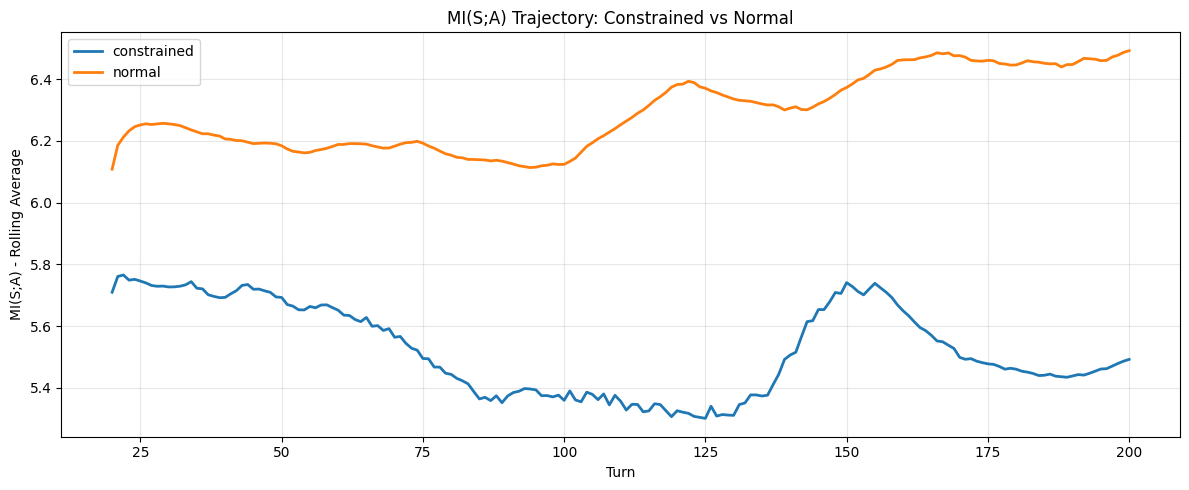

Saved: MI_S_A_trajectory.png


In [41]:
# MI_S_A trajectory by condition (smoothed)
fig, ax = plt.subplots(figsize=(12, 5))

window = 20  # Rolling average window

for condition in df['condition'].unique():
    df_cond = df[df['condition'] == condition].sort_values('Turn')
    # Group by turn and average across all conversations
    turn_avg = df_cond.groupby('Turn')['MI_S_A'].mean()
    smoothed = turn_avg.rolling(window).mean()
    ax.plot(smoothed.index, smoothed.values, label=condition, linewidth=2)

ax.set_xlabel('Turn')
ax.set_ylabel('MI(S;A) - Rolling Average')
ax.set_title('MI(S;A) Trajectory: Constrained vs Normal')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('MI_S_A_trajectory.png', dpi=150)
plt.show()

print("Saved: MI_S_A_trajectory.png")

In [42]:
# Compare metrics across tests
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A', 'H_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

print("Metrics by Test:")
print("=" * 80)

test_stats = df.groupby('test')[metrics].mean()
test_stats.to_csv('metrics_by_test.csv')
print("Saved: metrics_by_test.csv")

# Also show row counts
print("\nRows per test:")
print(df['test'].value_counts().sort_index())

Metrics by Test:
Saved: metrics_by_test.csv

Rows per test:
test
1     685
2     600
3    1197
4     600
6     150
Name: count, dtype: int64


In [43]:
# Exclude test 6, compare tests 1-4
df_filtered = df[df['test'] != 6]

metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A', 'H_A',
           'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

test_stats = df_filtered.groupby('test')[metrics].mean()
test_stats.to_csv('metrics_by_test_filtered.csv')

print("Metrics by Test (excluding test 6):")
print(test_stats.round(3).to_string())

Metrics by Test (excluding test 6):
          P     Hf     Hb  Delta  MI_S_A    H_A  cosine_sim  adjacent_coherence  cumulative_drift  score_openai
test                                                                                                           
1     0.265  0.008  3.222 -3.213   6.099  6.129       0.644               0.762             0.023         3.496
2     0.282  0.010  3.029 -3.019   5.469  5.487       0.636               0.700             0.023         2.578
3     0.269  0.006  3.187 -3.181   5.961  5.968       0.599               0.824             0.008         3.080
4     0.293  0.007  2.677 -2.670   6.391  6.400       0.717               0.697             0.038         4.822


In [44]:
# P by condition × test
df_filtered = df[df['test'] != 6]

print("P by Condition × Test:")
print("=" * 50)

pivot = df_filtered.groupby(['condition', 'test'])['P'].mean().unstack()
pivot.to_csv('P_by_condition_test.csv')

print(pivot.round(3).to_string())

P by Condition × Test:
test             1      2      3      4
condition                              
constrained  0.270  0.288  0.276    NaN
normal       0.256  0.276  0.262  0.293


In [45]:
# MI_S_A by condition × test
df_filtered = df[df['test'] != 6]

print("MI_S_A by Condition × Test:")
print("=" * 50)

pivot = df_filtered.groupby(['condition', 'test'])['MI_S_A'].mean().unstack()
pivot.to_csv('MI_S_A_by_condition_test.csv')

print(pivot.round(3).to_string())

MI_S_A by Condition × Test:
test             1      2      3      4
condition                              
constrained  5.976  5.477  5.444    NaN
normal       6.271  5.462  6.476  6.391


In [49]:
# Load test 7 injection data
file_test7 = "Test_Logs/a23_final_gemini_normal_test7_metrics.csv"  # Update with your metrics file path
df7 = pd.read_csv(file_test7)

print(f"Loaded {len(df7)} rows")
print(f"Unique teachers: {df7['teacher'].unique()}")
print(f"Injection turns: {df7[df7['injection']==1]['Turn'].tolist()}")

Loaded 105 rows
Unique teachers: ['gemini']
Injection turns: [31, 46, 61, 76, 91]


In [50]:
# Compare baseline vs injection periods
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A']

# Baseline: turns 1-30
baseline = df7[df7['Turn'] <= 30]

# Post-injection: turns 31-105
post_injection = df7[df7['Turn'] > 30]

# Injection turns only
injection_turns = df7[df7['injection'] == 1]

# Turns immediately after injection (1-3 turns after)
after_injection_turns = df7[df7['Turn'].isin([32, 33, 34, 47, 48, 49, 62, 63, 64, 77, 78, 79, 92, 93, 94])]

print("Metrics Comparison:")
print("=" * 60)
print(f"{'Metric':<15} {'Baseline':<12} {'At Injection':<15} {'After Inj':<12} {'Post-30':<12}")
print("-" * 60)

for m in metrics:
    base_mean = baseline[m].mean()
    inj_mean = injection_turns[m].mean()
    after_mean = after_injection_turns[m].mean()
    post_mean = post_injection[m].mean()
    print(f"{m:<15} {base_mean:<12.3f} {inj_mean:<15.3f} {after_mean:<12.3f} {post_mean:<12.3f}")

Metrics Comparison:
Metric          Baseline     At Injection    After Inj    Post-30     
------------------------------------------------------------
P               0.285        0.203           0.280        0.273       
Hf              0.031        0.002           0.005        0.004       
Hb              2.530        5.077           3.006        3.237       
Delta           -2.499       -5.075          -3.001       -3.233      
MI_S_A          6.209        6.394           6.488        6.416       


In [52]:
# Load the complete test 7 file
file_test7_full = "test7_log/a23_final_gemini_normal_test7_metrics.csv"
df7 = pd.read_csv(file_test7_full)

print(f"Loaded {len(df7)} rows")
print(f"Columns: {df7.columns.tolist()}")

Loaded 105 rows
Columns: ['teacher', 'condition', 'test', 'DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'Prompt', 'Response', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'injection', 'score_openai', 'explanation_openai']


In [54]:
# Compare all metrics: baseline vs injection
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

# Baseline: turns 1-30
baseline = df7[df7['Turn'] <= 30]

# At injection turns only
injection_turns = df7[df7['injection'] == 1]

# Turns immediately after injection (1-3 turns after)
after_injection_turns = df7[df7['Turn'].isin([32, 33, 34, 47, 48, 49, 62, 63, 64, 77, 78, 79, 92, 93, 94])]

# Post-30 (all turns after baseline)
post_injection = df7[df7['Turn'] > 30]

print("Full Metrics Comparison:")
print("=" * 70)
print(f"{'Metric':<22} {'Baseline':<12} {'At Injection':<15} {'After Inj':<12} {'Post-30':<12}")
print("-" * 70)

for m in metrics:
    base_mean = baseline[m].mean()
    inj_mean = injection_turns[m].mean()
    after_mean = after_injection_turns[m].mean()
    post_mean = post_injection[m].mean()
    print(f"{m:<22} {base_mean:<12.3f} {inj_mean:<15.3f} {after_mean:<12.3f} {post_mean:<12.3f}")

Full Metrics Comparison:
Metric                 Baseline     At Injection    After Inj    Post-30     
----------------------------------------------------------------------
P                      0.285        0.203           0.280        0.273       
Hf                     0.031        0.002           0.005        0.004       
Hb                     2.530        5.077           3.006        3.237       
Delta                  -2.499       -5.075          -3.001       -3.233      
MI_S_A                 6.209        6.394           6.488        6.416       
cosine_sim             0.689        -0.004          0.686        0.633       
adjacent_coherence     0.699        0.568           0.670        0.667       
cumulative_drift       0.113        0.048           0.071        0.040       
score_openai           4.067        2.200           4.600        4.227       


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Test 7 injection data
file_test7 = "Test_Logs/a23_all_normal_test7_metrics.csv"
df7 = pd.read_csv(file_test7)

print(f"Total rows: {len(df7)}")
print(f"\nColumns: {list(df7.columns)}")
print(f"\nUnique teachers: {df7['teacher'].unique()}")
print(f"\nRows per teacher:")
print(df7['teacher'].value_counts())
print(f"\nInjection turns: {df7[df7['injection']==1]['Turn'].unique().tolist()}")

Total rows: 315

Columns: ['teacher', 'condition', 'test', 'DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'Prompt', 'Response', 'injection', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai', 'explanation_openai', 'Unnamed: 30']

Unique teachers: ['claude' 'chatgpt' 'gemini']

Rows per teacher:
teacher
claude     105
chatgpt    105
gemini     105
Name: count, dtype: int64

Injection turns: [31, 46, 61, 76, 91]


In [2]:
# Compare metrics: Baseline vs Injection vs Recovery
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

# Baseline: turns 1-30
baseline = df7[df7['Turn'] <= 30]

# Injection turns only
injection = df7[df7['injection'] == 1]

# Recovery: 3 turns after each injection
recovery_turns = [32,33,34, 47,48,49, 62,63,64, 77,78,79, 92,93,94]
recovery = df7[df7['Turn'].isin(recovery_turns)]

print("=" * 80)
print("TEST 7 INJECTION ANALYSIS - ALL TEACHERS COMBINED")
print("=" * 80)
print(f"{'Metric':<22} {'Baseline':<12} {'Injection':<12} {'Recovery':<12} {'Inj vs Base':<12}")
print("-" * 80)

for m in metrics:
    base_mean = baseline[m].mean()
    inj_mean = injection[m].mean()
    rec_mean = recovery[m].mean()
    pct_change = ((inj_mean - base_mean) / base_mean) * 100 if base_mean != 0 else 0
    print(f"{m:<22} {base_mean:<12.3f} {inj_mean:<12.3f} {rec_mean:<12.3f} {pct_change:>+10.1f}%")

TEST 7 INJECTION ANALYSIS - ALL TEACHERS COMBINED
Metric                 Baseline     Injection    Recovery     Inj vs Base 
--------------------------------------------------------------------------------
P                      0.296        0.201        0.290             -31.9%
Hf                     0.035        0.002        0.004             -95.2%
Hb                     2.167        5.114        2.698            +136.0%
Delta                  -2.132       -5.112       -2.694           +139.8%
MI_S_A                 6.432        6.471        6.512              +0.6%
cosine_sim             0.707        0.049        0.708             -93.1%
adjacent_coherence     0.691        0.653        0.680              -5.5%
cumulative_drift       0.184        0.160        0.150             -13.1%
score_openai           5.056        2.800        4.778             -44.6%


In [4]:
# Compare injection response BY TEACHER
print("=" * 90)
print("INJECTION RESPONSE BY TEACHER")
print("=" * 90)

metrics = ['P', 'Hb', 'cosine_sim', 'score_openai']

for teacher in df7['teacher'].unique():
    df_t = df7[df7['teacher'] == teacher]
    baseline_t = df_t[df_t['Turn'] <= 30]
    injection_t = df_t[df_t['injection'] == 1]

    print(f"\n{teacher.upper()}")
    print("-" * 50)
    print(f"{'Metric':<20} {'Baseline':<12} {'Injection':<12} {'Change':<12}")

    for m in metrics:
        base = baseline_t[m].mean()
        inj = injection_t[m].mean()
        pct = ((inj - base) / base) * 100 if base != 0 else 0
        print(f"{m:<20} {base:<12.3f} {inj:<12.3f} {pct:>+10.1f}%")

INJECTION RESPONSE BY TEACHER

CLAUDE
--------------------------------------------------
Metric               Baseline     Injection    Change      
P                    0.312        0.199             -36.3%
Hb                   1.688        5.296            +213.8%
cosine_sim           0.718        0.109             -84.8%
score_openai         5.433        3.600             -33.7%

CHATGPT
--------------------------------------------------
Metric               Baseline     Injection    Change      
P                    0.290        0.203             -30.0%
Hb                   2.284        4.970            +117.5%
cosine_sim           0.713        0.042             -94.1%
score_openai         5.667        2.600             -54.1%

GEMINI
--------------------------------------------------
Metric               Baseline     Injection    Change      
P                    0.285        0.203             -28.8%
Hb                   2.530        5.077            +100.7%
cosine_sim           0

In [5]:
# Correlation at injection points only
injection_only = df7[df7['injection'] == 1]

print("=" * 60)
print("CORRELATIONS AT INJECTION TURNS (n=15)")
print("=" * 60)

p_metrics = ['P', 'Hf', 'Hb', 'Delta']
baseline_metrics = ['cosine_sim', 'score_openai']

for p in p_metrics:
    print(f"\n{p}:")
    for b in baseline_metrics:
        r = injection_only[p].corr(injection_only[b])
        print(f"  vs {b:<20} r = {r:.3f}")

CORRELATIONS AT INJECTION TURNS (n=15)

P:
  vs cosine_sim           r = -0.051
  vs score_openai         r = -0.302

Hf:
  vs cosine_sim           r = -0.410
  vs score_openai         r = -0.644

Hb:
  vs cosine_sim           r = 0.092
  vs score_openai         r = 0.348

Delta:
  vs cosine_sim           r = -0.092
  vs score_openai         r = -0.349


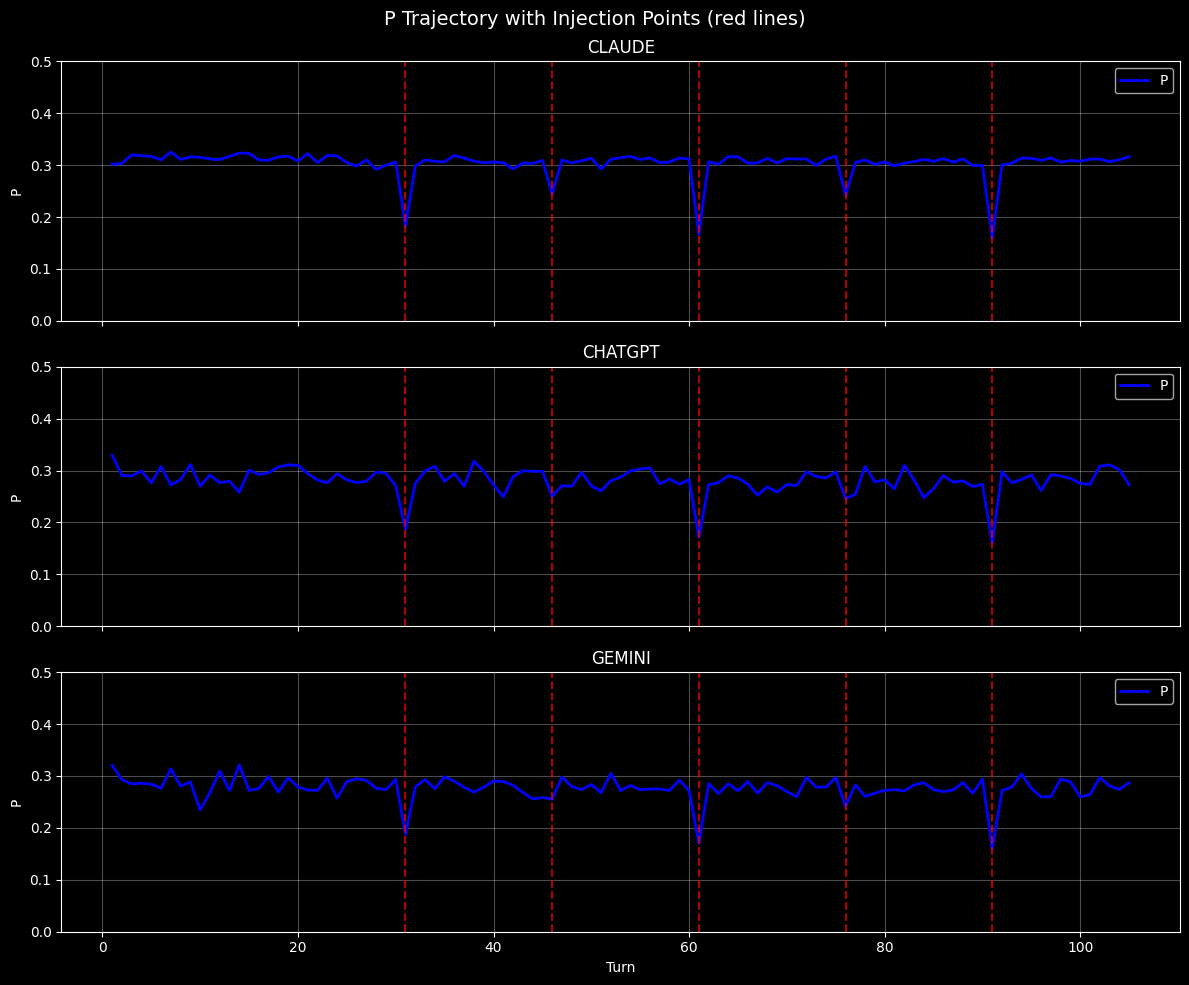

Saved: test7_P_trajectory.png


In [6]:
# Plot P trajectory for all teachers with injection markers
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

injection_turns = [31, 46, 61, 76, 91]

for idx, teacher in enumerate(['claude', 'chatgpt', 'gemini']):
    df_t = df7[df7['teacher'] == teacher]
    ax = axes[idx]

    # Plot P
    ax.plot(df_t['Turn'], df_t['P'], label='P', linewidth=2, color='blue')

    # Mark injection points
    for inj in injection_turns:
        ax.axvline(x=inj, color='red', linestyle='--', alpha=0.7)

    ax.set_ylabel('P')
    ax.set_title(f'{teacher.upper()}')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 0.5)

axes[2].set_xlabel('Turn')
plt.suptitle('P Trajectory with Injection Points (red lines)', fontsize=14)
plt.tight_layout()
plt.savefig('test7_P_trajectory.png', dpi=150)
plt.show()
print("Saved: test7_P_trajectory.png")

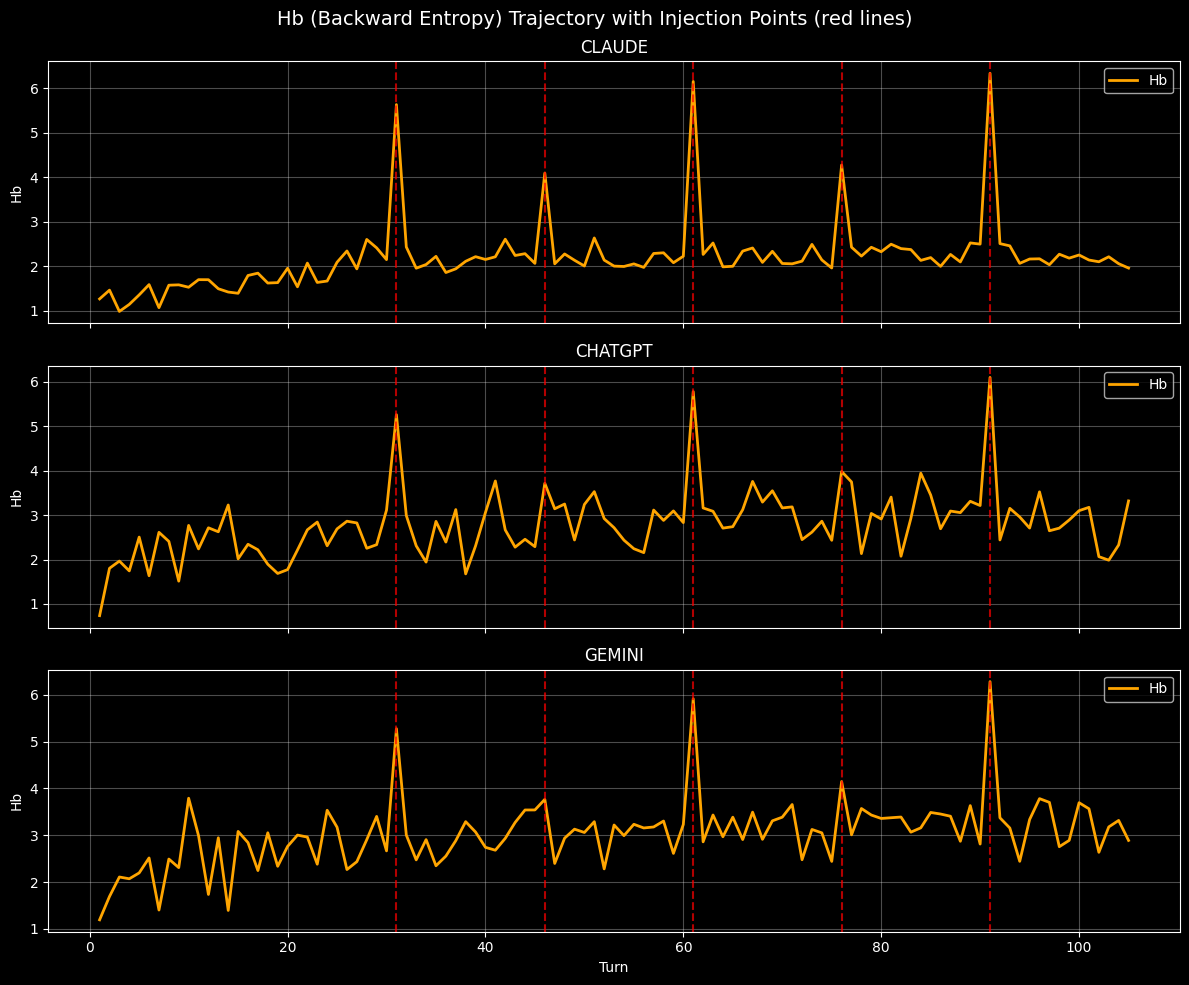

Saved: test7_Hb_trajectory.png


In [7]:
# Plot Hb trajectory for all teachers with injection markers
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

injection_turns = [31, 46, 61, 76, 91]

for idx, teacher in enumerate(['claude', 'chatgpt', 'gemini']):
    df_t = df7[df7['teacher'] == teacher]
    ax = axes[idx]

    # Plot Hb
    ax.plot(df_t['Turn'], df_t['Hb'], label='Hb', linewidth=2, color='orange')

    # Mark injection points
    for inj in injection_turns:
        ax.axvline(x=inj, color='red', linestyle='--', alpha=0.7)

    ax.set_ylabel('Hb')
    ax.set_title(f'{teacher.upper()}')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

axes[2].set_xlabel('Turn')
plt.suptitle('Hb (Backward Entropy) Trajectory with Injection Points (red lines)', fontsize=14)
plt.tight_layout()
plt.savefig('test7_Hb_trajectory.png', dpi=150)
plt.show()
print("Saved: test7_Hb_trajectory.png")

In [8]:
# Statistical test: Baseline vs Injection
from scipy import stats

print("=" * 70)
print("STATISTICAL SIGNIFICANCE: BASELINE vs INJECTION")
print("=" * 70)

metrics = ['P', 'Hb', 'cosine_sim', 'score_openai']

baseline = df7[df7['Turn'] <= 30]
injection = df7[df7['injection'] == 1]

print(f"\nSample sizes: Baseline n={len(baseline)}, Injection n={len(injection)}")
print("-" * 70)
print(f"{'Metric':<20} {'Baseline':<12} {'Injection':<12} {'t-stat':<12} {'p-value':<12} {'Significant?'}")
print("-" * 70)

for m in metrics:
    base_vals = baseline[m].dropna()
    inj_vals = injection[m].dropna()

    t_stat, p_val = stats.ttest_ind(base_vals, inj_vals)
    sig = "YES ***" if p_val < 0.001 else ("YES **" if p_val < 0.01 else ("YES *" if p_val < 0.05 else "No"))

    print(f"{m:<20} {base_vals.mean():<12.3f} {inj_vals.mean():<12.3f} {t_stat:<12.2f} {p_val:<12.6f} {sig}")

STATISTICAL SIGNIFICANCE: BASELINE vs INJECTION

Sample sizes: Baseline n=90, Injection n=15
----------------------------------------------------------------------
Metric               Baseline     Injection    t-stat       p-value      Significant?
----------------------------------------------------------------------
P                    0.296        0.201        14.93        0.000000     YES ***
Hb                   2.167        5.114        -15.18       0.000000     YES ***
cosine_sim           0.707        0.049        27.59        0.000000     YES ***
score_openai         5.056        2.800        6.68         0.000000     YES ***


In [9]:
# Load master metrics file
file_master = "Test_Logs/Llama_Master_metrics_dec_28.csv"
df = pd.read_csv(file_master)

print(f"Total rows: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nUnique teachers: {df['teacher'].unique()}")
print(f"Unique conditions: {df['condition'].unique()}")
print(f"Unique tests: {df['test'].unique()}")

print(f"\nRows per condition:")
print(df['condition'].value_counts())

print(f"\nRows per teacher:")
print(df['teacher'].value_counts())

print(f"\nRows per test:")
print(df['test'].value_counts())

Total rows: 3550

Columns: ['UID', 'teacher', 'condition', 'test', 'DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'Prompt', 'Response', 'injection', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai', 'explanation_openai']

Unique teachers: ['chatgpt' 'claude' 'gemini']
Unique conditions: ['constrained' 'normal']
Unique tests: [1 2 3 6 4 7]

Rows per condition:
condition
normal         2100
constrained    1450
Name: count, dtype: int64

Rows per teacher:
teacher
gemini     1290
claude     1155
chatgpt    1105
Name: count, dtype: int64

Rows per test:
test
3    1200
1     685
2     600
4     600
7     315
6     150
Name: count, dtype: int64


In [10]:
# Overview: Mean metrics by condition
print("=" * 80)
print("MEAN METRICS BY CONDITION")
print("=" * 80)

metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A', 'cosine_sim', 'score_openai']

print(f"\n{'Metric':<20} {'Constrained':<15} {'Normal':<15} {'Difference':<15}")
print("-" * 65)

for m in metrics:
    const = df[df['condition'] == 'constrained'][m].mean()
    norm = df[df['condition'] == 'normal'][m].mean()
    diff_pct = ((norm - const) / const) * 100 if const != 0 else 0
    print(f"{m:<20} {const:<15.3f} {norm:<15.3f} {diff_pct:>+12.1f}%")

MEAN METRICS BY CONDITION

Metric               Constrained     Normal          Difference     
-----------------------------------------------------------------
P                    0.275           0.276                   +0.4%
Hf                   0.008           0.008                   -5.0%
Hb                   3.182           3.006                   -5.6%
Delta                -3.174          -2.998                  -5.6%
MI_S_A               5.546           6.281                  +13.2%
cosine_sim           0.612           0.649                   +6.0%
score_openai         2.597           4.168                  +60.5%


In [11]:
# Overview: Mean metrics by test
print("=" * 90)
print("MEAN METRICS BY TEST")
print("=" * 90)

metrics = ['P', 'MI_S_A', 'cosine_sim', 'score_openai']

# Clean test values (remove whitespace)
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print(f"\n{'Test':<10} {'N':<8} {'P':<12} {'MI_S_A':<12} {'cosine_sim':<12} {'score_openai':<12}")
print("-" * 70)

for test in sorted(df['test_clean'].unique()):
    df_t = df[df['test_clean'] == test]
    n = len(df_t)
    p_mean = df_t['P'].mean()
    mi_mean = df_t['MI_S_A'].mean()
    cos_mean = df_t['cosine_sim'].mean()
    score_mean = df_t['score_openai'].mean()
    print(f"{test:<10} {n:<8} {p_mean:<12.3f} {mi_mean:<12.3f} {cos_mean:<12.3f} {score_mean:<12.3f}")

MEAN METRICS BY TEST

Test       N        P            MI_S_A       cosine_sim   score_openai
----------------------------------------------------------------------
1          685      0.265        6.099        0.644        3.496       
2          600      0.282        5.469        0.636        2.578       
3          1200     0.269        5.961        0.599        3.080       
4          600      0.293        6.391        0.717        4.822       
6          150      0.252        4.944        0.436        2.653       
7          315      0.287        6.486        0.679        5.051       


In [12]:
# Full correlation matrix - master dataset
metrics = ['P', 'Hf', 'Hb', 'Delta', 'MI_S_A', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

corr_matrix = df[metrics].corr()

# Save to CSV
corr_matrix.to_csv('correlation_matrix_master.csv')

# Display key correlations with score_openai
print("=" * 60)
print("CORRELATIONS WITH SCORE_OPENAI (n=3550)")
print("=" * 60)
print(f"\n{'Metric':<25} {'r':<10} {'Strength'}")
print("-" * 50)

for m in metrics[:-1]:  # exclude score_openai itself
    r = corr_matrix.loc[m, 'score_openai']
    strength = "Strong" if abs(r) > 0.5 else ("Moderate" if abs(r) > 0.3 else "Weak")
    print(f"{m:<25} {r:<10.3f} {strength}")

CORRELATIONS WITH SCORE_OPENAI (n=3550)

Metric                    r          Strength
--------------------------------------------------
P                         0.144      Weak
Hf                        0.007      Weak
Hb                        -0.239     Weak
Delta                     0.235      Weak
MI_S_A                    0.566      Strong
cosine_sim                0.325      Moderate
adjacent_coherence        -0.122     Weak
cumulative_drift          0.179      Weak


In [13]:
# Correlations with score_openai BY CONDITION
print("=" * 70)
print("CORRELATIONS WITH SCORE_OPENAI BY CONDITION")
print("=" * 70)

metrics = ['P', 'MI_S_A', 'Hb', 'Delta', 'cosine_sim']

print(f"\n{'Metric':<20} {'Constrained':<15} {'Normal':<15}")
print("-" * 50)

for m in metrics:
    r_const = df[df['condition'] == 'constrained'][m].corr(df[df['condition'] == 'constrained']['score_openai'])
    r_norm = df[df['condition'] == 'normal'][m].corr(df[df['condition'] == 'normal']['score_openai'])
    print(f"{m:<20} {r_const:<15.3f} {r_norm:<15.3f}")

CORRELATIONS WITH SCORE_OPENAI BY CONDITION

Metric               Constrained     Normal         
--------------------------------------------------
P                    -0.079          0.264          
MI_S_A               0.463           0.425          
Hb                   -0.107          -0.271         
Delta                0.108           0.267          
cosine_sim           0.183           0.377          


In [14]:
# Compare Test 7 (injection) vs Other tests
print("=" * 70)
print("TEST 7 (INJECTION) vs OTHER TESTS")
print("=" * 70)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

test7 = df[df['test_clean'] == '7']
other = df[df['test_clean'] != '7']

metrics = ['P', 'MI_S_A', 'Hb', 'cosine_sim', 'score_openai']

print(f"\n{'Metric':<20} {'Test 7 (n=315)':<18} {'Other (n=3235)':<18}")
print("-" * 60)

for m in metrics:
    t7_mean = test7[m].mean()
    ot_mean = other[m].mean()
    print(f"{m:<20} {t7_mean:<18.3f} {ot_mean:<18.3f}")

# Correlation with score in Test 7 vs Others
print(f"\n{'Correlation with score_openai:'}")
print("-" * 60)
for m in ['P', 'MI_S_A', 'cosine_sim']:
    r_t7 = test7[m].corr(test7['score_openai'])
    r_ot = other[m].corr(other['score_openai'])
    print(f"{m:<20} {r_t7:<18.3f} {r_ot:<18.3f}")

TEST 7 (INJECTION) vs OTHER TESTS

Metric               Test 7 (n=315)     Other (n=3235)    
------------------------------------------------------------
P                    0.287              0.274             
MI_S_A               6.486              5.931             
Hb                   2.679              3.117             
cosine_sim           0.679              0.630             
score_openai         5.051              3.379             

Correlation with score_openai:
------------------------------------------------------------
P                    0.471              0.080             
MI_S_A               0.296              0.552             
cosine_sim           0.443              0.303             


In [15]:
# Export summary statistics for paper
summary = []

# By condition
for cond in ['constrained', 'normal']:
    df_c = df[df['condition'] == cond]
    summary.append({
        'Group': f'Condition: {cond}',
        'N': len(df_c),
        'P_mean': df_c['P'].mean(),
        'MI_S_A_mean': df_c['MI_S_A'].mean(),
        'score_mean': df_c['score_openai'].mean(),
        'P_vs_score_r': df_c['P'].corr(df_c['score_openai']),
        'MI_S_A_vs_score_r': df_c['MI_S_A'].corr(df_c['score_openai'])
    })

# By test
for test in sorted(df['test_clean'].unique()):
    df_t = df[df['test_clean'] == test]
    summary.append({
        'Group': f'Test: {test}',
        'N': len(df_t),
        'P_mean': df_t['P'].mean(),
        'MI_S_A_mean': df_t['MI_S_A'].mean(),
        'score_mean': df_t['score_openai'].mean(),
        'P_vs_score_r': df_t['P'].corr(df_t['score_openai']),
        'MI_S_A_vs_score_r': df_t['MI_S_A'].corr(df_t['score_openai'])
    })

summary_df = pd.DataFrame(summary)
summary_df.to_csv('summary_statistics_master.csv', index=False)
print("Saved: summary_statistics_master.csv")
print("\n")
print(summary_df.to_string(index=False))

Saved: summary_statistics_master.csv


                 Group    N   P_mean  MI_S_A_mean  score_mean  P_vs_score_r  MI_S_A_vs_score_r
Condition: constrained 1450 0.274707     5.546241    2.597097     -0.079247           0.462942
     Condition: normal 2100 0.275765     6.280551    4.168095      0.264068           0.425196
               Test: 1  685 0.264530     6.098591    3.496350     -0.145175           0.319908
               Test: 2  600 0.282010     5.469298    2.578333     -0.123608           0.398892
               Test: 3 1200 0.269157     5.960529    3.080201     -0.069162           0.520958
               Test: 4  600 0.292852     6.391391    4.821667      0.255242           0.530361
               Test: 6  150 0.252264     4.943626    2.653333     -0.032816           0.568196
               Test: 7  315 0.287252     6.485968    5.050794      0.471213           0.295770


In [16]:
# Check if P leads or lags score_openai
print("=" * 60)
print("LAGGED CORRELATION: Does P predict NEXT turn's score?")
print("=" * 60)

# For each teacher in Test 7
df7 = df[df['test_clean'] == '7'].copy()

for teacher in df7['teacher'].unique():
    df_t = df7[df7['teacher'] == teacher].sort_values('Turn').reset_index(drop=True)

    # Create lagged score (next turn's score)
    df_t['score_next'] = df_t['score_openai'].shift(-1)
    df_t['P_prev'] = df_t['P'].shift(1)

    # Correlations
    r_same = df_t['P'].corr(df_t['score_openai'])
    r_P_leads = df_t['P'].corr(df_t['score_next'])
    r_P_lags = df_t['P_prev'].corr(df_t['score_openai'])

    print(f"\n{teacher.upper()}")
    print(f"  P(t) vs Score(t):   r = {r_same:.3f}  (same turn)")
    print(f"  P(t) vs Score(t+1): r = {r_P_leads:.3f}  (P leads)")
    print(f"  P(t-1) vs Score(t): r = {r_P_lags:.3f}  (P lags)")

LAGGED CORRELATION: Does P predict NEXT turn's score?

CLAUDE
  P(t) vs Score(t):   r = 0.423  (same turn)
  P(t) vs Score(t+1): r = 0.099  (P leads)
  P(t-1) vs Score(t): r = 0.099  (P lags)

CHATGPT
  P(t) vs Score(t):   r = 0.340  (same turn)
  P(t) vs Score(t+1): r = 0.218  (P leads)
  P(t-1) vs Score(t): r = 0.218  (P lags)

GEMINI
  P(t) vs Score(t):   r = 0.356  (same turn)
  P(t) vs Score(t+1): r = -0.014  (P leads)
  P(t-1) vs Score(t): r = -0.014  (P lags)


In [17]:
# P trajectory over long conversations (Test 3 = 200 turns)
print("=" * 60)
print("P TRAJECTORY OVER LONG CONVERSATIONS")
print("=" * 60)

df3 = df[df['test_clean'] == '3'].copy()

print(f"Test 3 rows: {len(df3)}")
print(f"Teachers: {df3['teacher'].unique()}")

# Bin turns into phases
df3['phase'] = pd.cut(df3['Turn'], bins=[0, 50, 100, 150, 200], labels=['1-50', '51-100', '101-150', '151-200'])

# Mean metrics by phase
print(f"\n{'Phase':<12} {'P':<10} {'MI_S_A':<10} {'score':<10} {'N':<8}")
print("-" * 45)

for phase in ['1-50', '51-100', '101-150', '151-200']:
    df_p = df3[df3['phase'] == phase]
    if len(df_p) > 0:
        print(f"{phase:<12} {df_p['P'].mean():<10.3f} {df_p['MI_S_A'].mean():<10.3f} {df_p['score_openai'].mean():<10.3f} {len(df_p):<8}")

P TRAJECTORY OVER LONG CONVERSATIONS
Test 3 rows: 1200
Teachers: ['chatgpt' 'claude' 'gemini']

Phase        P          MI_S_A     score      N       
---------------------------------------------
1-50         0.264      5.997      3.183      300     
51-100       0.266      5.924      2.990      300     
101-150      0.271      5.911      3.033      300     
151-200      0.275      6.010      3.114      300     


In [18]:
# All metrics trajectory over long conversations (Test 3)
print("=" * 70)
print("ALL METRICS TRAJECTORY OVER 200 TURNS (Test 3)")
print("=" * 70)

df3 = df[df['test_clean'] == '3'].copy()
df3['phase'] = pd.cut(df3['Turn'], bins=[0, 50, 100, 150, 200], labels=['1-50', '51-100', '101-150', '151-200'])

metrics = ['P', 'MI_S_A', 'Hb', 'Delta', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']

print(f"\n{'Phase':<12}", end="")
for m in metrics:
    print(f"{m:<12}", end="")
print()
print("-" * 108)

for phase in ['1-50', '51-100', '101-150', '151-200']:
    df_p = df3[df3['phase'] == phase]
    if len(df_p) > 0:
        print(f"{phase:<12}", end="")
        for m in metrics:
            print(f"{df_p[m].mean():<12.3f}", end="")
        print()

ALL METRICS TRAJECTORY OVER 200 TURNS (Test 3)

Phase       P           MI_S_A      Hb          Delta       cosine_sim  adjacent_coherencecumulative_driftscore_openai
------------------------------------------------------------------------------------------------------------
1-50        0.264       5.997       3.241       -3.223      0.588       0.748       0.002       3.183       
51-100      0.266       5.924       3.322       -3.320      0.604       0.839       0.015       2.990       
101-150     0.271       5.911       3.146       -3.145      0.605       0.875       0.015       3.033       
151-200     0.275       6.010       3.033       -3.030      0.600       0.837       -0.000      3.114       


In [19]:
# Create composite coherence score from 4 baseline metrics
# Normalize each metric, combine

from sklearn.preprocessing import MinMaxScaler

print("=" * 60)
print("COHERENCE COMPOSITE vs P")
print("=" * 60)

# Select metrics for composite (flip cumulative_drift since higher = worse)
df_comp = df[['P', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']].dropna().copy()

# Normalize to 0-1
scaler = MinMaxScaler()
df_comp['cos_norm'] = scaler.fit_transform(df_comp[['cosine_sim']])
df_comp['adj_norm'] = scaler.fit_transform(df_comp[['adjacent_coherence']])
df_comp['drift_norm'] = 1 - scaler.fit_transform(df_comp[['cumulative_drift']])  # flip
df_comp['score_norm'] = scaler.fit_transform(df_comp[['score_openai']])

# Composite coherence = average of normalized metrics
df_comp['coherence'] = (df_comp['cos_norm'] + df_comp['adj_norm'] + df_comp['drift_norm'] + df_comp['score_norm']) / 4

# Correlation with P
r = df_comp['P'].corr(df_comp['coherence'])

print(f"\nCoherence composite = avg(cosine_sim, adjacent_coherence, 1-cumulative_drift, score_openai)")
print(f"\nP vs Coherence: r = {r:.3f}")

# Also show components
print(f"\nComponent correlations with P:")
print(f"  cosine_sim:         r = {df_comp['P'].corr(df_comp['cosine_sim']):.3f}")
print(f"  adjacent_coherence: r = {df_comp['P'].corr(df_comp['adjacent_coherence']):.3f}")
print(f"  1-cumulative_drift: r = {df_comp['P'].corr(df_comp['drift_norm']):.3f}")
print(f"  score_openai:       r = {df_comp['P'].corr(df_comp['score_openai']):.3f}")

COHERENCE COMPOSITE vs P

Coherence composite = avg(cosine_sim, adjacent_coherence, 1-cumulative_drift, score_openai)

P vs Coherence: r = 0.185

Component correlations with P:
  cosine_sim:         r = 0.292
  adjacent_coherence: r = -0.033
  1-cumulative_drift: r = -0.093
  score_openai:       r = 0.144


In [20]:
# Accurate counts: Normal condition only, by test
print("=" * 60)
print("NORMAL CONDITION ONLY - COUNTS BY TEST")
print("=" * 60)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

df_normal = df[df['condition'] == 'normal']

print(f"\nTotal Normal rows: {len(df_normal)}")
print(f"\nBreakdown by test:")
print("-" * 40)

for test in sorted(df_normal['test_clean'].unique()):
    n = len(df_normal[df_normal['test_clean'] == test])
    print(f"Test {test}: {n} turns")

# Baseline candidates (exclude Test 7)
df_baseline = df_normal[df_normal['test_clean'] != '7']
print(f"\n" + "=" * 40)
print(f"BASELINE CANDIDATE (Normal, excl. Test 7): {len(df_baseline)} turns")

NORMAL CONDITION ONLY - COUNTS BY TEST

Total Normal rows: 2100

Breakdown by test:
----------------------------------------
Test 1: 285 turns
Test 2: 300 turns
Test 3: 600 turns
Test 4: 600 turns
Test 7: 315 turns

BASELINE CANDIDATE (Normal, excl. Test 7): 1785 turns


In [21]:
# COHERENCE ANALYSIS - BASELINE ONLY (Normal, excl. Test 7)
from sklearn.preprocessing import MinMaxScaler

print("=" * 60)
print("COHERENCE COMPOSITE vs P - BASELINE ONLY")
print("=" * 60)

# Filter to baseline
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')
df_baseline = df[(df['condition'] == 'normal') & (df['test_clean'] != '7')].copy()

print(f"Baseline rows: {len(df_baseline)}")

# Select metrics
df_comp = df_baseline[['P', 'MI_S_A', 'Hb', 'Delta', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai']].dropna().copy()

# Normalize to 0-1
scaler = MinMaxScaler()
df_comp['cos_norm'] = scaler.fit_transform(df_comp[['cosine_sim']])
df_comp['adj_norm'] = scaler.fit_transform(df_comp[['adjacent_coherence']])
df_comp['drift_norm'] = 1 - scaler.fit_transform(df_comp[['cumulative_drift']])  # flip
df_comp['score_norm'] = scaler.fit_transform(df_comp[['score_openai']])

# Composite coherence
df_comp['coherence'] = (df_comp['cos_norm'] + df_comp['adj_norm'] + df_comp['drift_norm'] + df_comp['score_norm']) / 4

# Correlations
print(f"\nP vs Coherence composite: r = {df_comp['P'].corr(df_comp['coherence']):.3f}")
print(f"MI_S_A vs Coherence:      r = {df_comp['MI_S_A'].corr(df_comp['coherence']):.3f}")

print(f"\nP correlations with components:")
print(f"  cosine_sim:         r = {df_comp['P'].corr(df_comp['cosine_sim']):.3f}")
print(f"  adjacent_coherence: r = {df_comp['P'].corr(df_comp['adjacent_coherence']):.3f}")
print(f"  1-cumulative_drift: r = {df_comp['P'].corr(df_comp['drift_norm']):.3f}")
print(f"  score_openai:       r = {df_comp['P'].corr(df_comp['score_openai']):.3f}")

COHERENCE COMPOSITE vs P - BASELINE ONLY
Baseline rows: 1785

P vs Coherence composite: r = 0.198
MI_S_A vs Coherence:      r = 0.333

P correlations with components:
  cosine_sim:         r = 0.314
  adjacent_coherence: r = -0.169
  1-cumulative_drift: r = -0.048
  score_openai:       r = 0.198


In [23]:
# BASELINE ANALYSIS: COSINE + JUDGE SCORE BY TEST
print("=" * 70)
print("BASELINE COHERENCE: COSINE + JUDGE SCORE BY TEST (Normal only)")
print("=" * 70)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')
df_baseline = df[(df['condition'] == 'normal') & (df['test_clean'] != '7')]

print(f"\n{'Test':<8} {'N':<8} {'cosine':<12} {'score':<12} {'cos-score r':<12} | {'P (FYI)':<10} {'MI_S_A (FYI)':<12}")
print("-" * 85)

for test in sorted(df_baseline['test_clean'].unique()):
    df_t = df_baseline[df_baseline['test_clean'] == test]
    n = len(df_t)
    cos_mean = df_t['cosine_sim'].mean()
    score_mean = df_t['score_openai'].mean()
    cos_score_r = df_t['cosine_sim'].corr(df_t['score_openai'])
    p_mean = df_t['P'].mean()
    mi_mean = df_t['MI_S_A'].mean()
    print(f"{test:<8} {n:<8} {cos_mean:<12.3f} {score_mean:<12.3f} {cos_score_r:<12.3f} | {p_mean:<10.3f} {mi_mean:<12.3f}")

# Overall baseline
print("-" * 85)
cos_all = df_baseline['cosine_sim'].mean()
score_all = df_baseline['score_openai'].mean()
r_all = df_baseline['cosine_sim'].corr(df_baseline['score_openai'])
p_all = df_baseline['P'].mean()
mi_all = df_baseline['MI_S_A'].mean()
print(f"{'ALL':<8} {len(df_baseline):<8} {cos_all:<12.3f} {score_all:<12.3f} {r_all:<12.3f} | {p_all:<10.3f} {mi_all:<12.3f}")

BASELINE COHERENCE: COSINE + JUDGE SCORE BY TEST (Normal only)

Test     N        cosine       score        cos-score r  | P (FYI)    MI_S_A (FYI)
-------------------------------------------------------------------------------------
1        285      0.624        4.175        0.301        | 0.256      6.271       
2        300      0.642        2.597        0.216        | 0.276      5.462       
3        600      0.581        3.833        0.433        | 0.262      6.476       
4        600      0.717        4.822        0.222        | 0.293      6.391       
-------------------------------------------------------------------------------------
ALL      1785     0.644        4.012        0.359        | 0.274      6.244       


In [24]:
# Check constrained Tests 3 and 4
print("=" * 50)
print("CONSTRAINED TESTS 3 AND 4 - DO WE HAVE THEM?")
print("=" * 50)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

for test in ['3', '4']:
    df_const = df[(df['condition'] == 'constrained') & (df['test_clean'] == test)]
    df_norm = df[(df['condition'] == 'normal') & (df['test_clean'] == test)]
    print(f"\nTest {test}:")
    print(f"  Normal:      {len(df_norm)} turns")
    print(f"  Constrained: {len(df_const)} turns")

CONSTRAINED TESTS 3 AND 4 - DO WE HAVE THEM?

Test 3:
  Normal:      600 turns
  Constrained: 600 turns

Test 4:
  Normal:      600 turns
  Constrained: 0 turns


In [25]:
# TEST 3: NORMAL vs CONSTRAINED
print("=" * 70)
print("TEST 3: NORMAL vs CONSTRAINED")
print("=" * 70)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

df_norm = df[(df['condition'] == 'normal') & (df['test_clean'] == '3')]
df_const = df[(df['condition'] == 'constrained') & (df['test_clean'] == '3')]

print(f"\nNormal N:      {len(df_norm)}")
print(f"Constrained N: {len(df_const)}")

print(f"\n{'Metric':<20} {'Normal':<12} {'Constrained':<12} {'Difference':<12}")
print("-" * 60)

metrics = ['cosine_sim', 'score_openai', 'P', 'MI_S_A']
labels = ['cosine_sim', 'judge_score', 'P (FYI)', 'MI_S_A (FYI)']

for m, label in zip(metrics, labels):
    norm_mean = df_norm[m].mean()
    const_mean = df_const[m].mean()
    diff_pct = ((const_mean - norm_mean) / norm_mean) * 100 if norm_mean != 0 else 0
    print(f"{label:<20} {norm_mean:<12.3f} {const_mean:<12.3f} {diff_pct:>+10.1f}%")

# Correlation between cosine and judge score
print(f"\n" + "-" * 60)
print(f"cosine vs judge_score correlation:")
print(f"  Normal:      r = {df_norm['cosine_sim'].corr(df_norm['score_openai']):.3f}")
print(f"  Constrained: r = {df_const['cosine_sim'].corr(df_const['score_openai']):.3f}")

TEST 3: NORMAL vs CONSTRAINED

Normal N:      600
Constrained N: 600

Metric               Normal       Constrained  Difference  
------------------------------------------------------------
cosine_sim           0.581        0.618              +6.3%
judge_score          3.833        2.323             -39.4%
P (FYI)              0.262        0.276              +5.5%
MI_S_A (FYI)         6.476        5.445             -15.9%

------------------------------------------------------------
cosine vs judge_score correlation:
  Normal:      r = 0.433
  Constrained: r = 0.181


In [2]:
# TEST 8 ANALYSIS + COMPARISON WITH BASELINE TESTS
print(f"{'Test':<5} {'N':<6} {'cosine':<10} {'judge_score':<13} {'cos-judge r':<13} | {'P (FYI)':<10} {'MI_S_A (FYI)':<12} {'Delta H (FYI)':<12}")
print("-" * 105) # Extended line length to fit new column
import pandas as pd
# Reload master file to include Test 8
df = pd.read_csv("Test_Logs/Llama_Master_metrics_dec_29.csv")
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

# Filter normal condition only
df_norm = df[df['condition'] == 'normal']

# Tests to compare
tests = ['3', '4', '8']

print(f"\n{'Test':<8} {'N':<8} {'cosine':<12} {'judge_score':<14} {'cos-judge r':<12} | {'P (FYI)':<10} {'MI_S_A (FYI)':<12}")
print("-" * 90)

for test in tests:
    df_t = df_norm[df_norm['test_clean'] == test]
    if len(df_t) > 0:
        n = len(df_t)
        cos = df_t['cosine_sim'].mean()
        judge = df_t['score_openai'].mean()
        r = df_t['cosine_sim'].corr(df_t['score_openai'])
        p = df_t['P'].mean()
        mi = df_t['MI_S_A'].mean()
        print(f"{test:<8} {n:<8} {cos:<12.3f} {judge:<14.3f} {r:<12.3f} | {p:<10.3f} {mi:<12.3f}")
    else:
        print(f"{test:<8} NOT FOUND")

# Combined baseline (3 + 4 + 8)
df_baseline = df_norm[df_norm['test_clean'].isin(['3', '4', '8'])]
print("-" * 90)
print(f"{'ALL':<8} {len(df_baseline):<8} {df_baseline['cosine_sim'].mean():<12.3f} {df_baseline['score_openai'].mean():<14.3f} {df_baseline['cosine_sim'].corr(df_baseline['score_openai']):<12.3f} | {df_baseline['P'].mean():<10.3f} {df_baseline['MI_S_A'].mean():<12.3f}")

TEST 8 vs BASELINE TESTS (3, 4) - NORMAL CONDITION

Test     N        cosine       judge_score    cos-judge r  | P (FYI)    MI_S_A (FYI)
------------------------------------------------------------------------------------------
3        600      0.581        3.833          0.433        | 0.262      6.476       
4        600      0.717        4.822          0.222        | 0.293      6.391       
8        424      0.617        5.217          0.007        | 0.282      6.457       
------------------------------------------------------------------------------------------
ALL      1624     0.641        4.560          0.313        | 0.279      6.440       


In [4]:
# P and MI_S_A correlations with BASELINE (cosine, judge) by test
print("=" * 70)
print("P and MI_S_A CORRELATIONS WITH BASELINE METRICS BY TEST")
print("=" * 70)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')
df_norm = df[df['condition'] == 'normal']

tests = ['3', '4', '8']

print(f"\n{'Test':<8} {'P vs cos':<12} {'P vs judge':<12} | {'MI vs cos':<12} {'MI vs judge':<12}")
print("-" * 65)

for test in tests:
    df_t = df_norm[df_norm['test_clean'] == test]
    if len(df_t) > 0:
        p_cos = df_t['P'].corr(df_t['cosine_sim'])
        p_judge = df_t['P'].corr(df_t['score_openai'])
        mi_cos = df_t['MI_S_A'].corr(df_t['cosine_sim'])
        mi_judge = df_t['MI_S_A'].corr(df_t['score_openai'])
        print(f"{test:<8} {p_cos:<12.3f} {p_judge:<12.3f} | {mi_cos:<12.3f} {mi_judge:<12.3f}")

# Combined
df_baseline = df_norm[df_norm['test_clean'].isin(['3', '4', '8'])]
print("-" * 65)
p_cos_all = df_baseline['P'].corr(df_baseline['cosine_sim'])
p_judge_all = df_baseline['P'].corr(df_baseline['score_openai'])
mi_cos_all = df_baseline['MI_S_A'].corr(df_baseline['cosine_sim'])
mi_judge_all = df_baseline['MI_S_A'].corr(df_baseline['score_openai'])
print(f"{'ALL':<8} {p_cos_all:<12.3f} {p_judge_all:<12.3f} | {mi_cos_all:<12.3f} {mi_judge_all:<12.3f}")

P and MI_S_A CORRELATIONS WITH BASELINE METRICS BY TEST

Test     P vs cos     P vs judge   | MI vs cos    MI vs judge 
-----------------------------------------------------------------
3        0.362        0.194        | -0.474       -0.178      
4        0.137        0.255        | 0.217        0.530       
8        0.329        -0.069       | 0.122        0.140       
-----------------------------------------------------------------
ALL      0.421        0.299        | -0.198       0.110       


In [5]:
# Hf, Hb, Delta correlations with BASELINE (cosine, judge) by test
print("=" * 70)
print("Hf, Hb, Delta CORRELATIONS WITH BASELINE METRICS BY TEST")
print("=" * 70)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')
df_norm = df[df['condition'] == 'normal']

tests = ['3', '4', '8']

print(f"\n{'Test':<8} {'Hf vs cos':<12} {'Hf vs judge':<12} | {'Hb vs cos':<12} {'Hb vs judge':<12} | {'Delta vs cos':<12} {'Delta vs judge':<12}")
print("-" * 95)

for test in tests:
    df_t = df_norm[df_norm['test_clean'] == test]
    if len(df_t) > 0:
        hf_cos = df_t['Hf'].corr(df_t['cosine_sim'])
        hf_judge = df_t['Hf'].corr(df_t['score_openai'])
        hb_cos = df_t['Hb'].corr(df_t['cosine_sim'])
        hb_judge = df_t['Hb'].corr(df_t['score_openai'])
        delta_cos = df_t['Delta'].corr(df_t['cosine_sim'])
        delta_judge = df_t['Delta'].corr(df_t['score_openai'])
        print(f"{test:<8} {hf_cos:<12.3f} {hf_judge:<12.3f} | {hb_cos:<12.3f} {hb_judge:<12.3f} | {delta_cos:<12.3f} {delta_judge:<12.3f}")

# Combined
df_baseline = df_norm[df_norm['test_clean'].isin(['3', '4', '8'])]
print("-" * 95)
hf_cos_all = df_baseline['Hf'].corr(df_baseline['cosine_sim'])
hf_judge_all = df_baseline['Hf'].corr(df_baseline['score_openai'])
hb_cos_all = df_baseline['Hb'].corr(df_baseline['cosine_sim'])
hb_judge_all = df_baseline['Hb'].corr(df_baseline['score_openai'])
delta_cos_all = df_baseline['Delta'].corr(df_baseline['cosine_sim'])
delta_judge_all = df_baseline['Delta'].corr(df_baseline['score_openai'])
print(f"{'ALL':<8} {hf_cos_all:<12.3f} {hf_judge_all:<12.3f} | {hb_cos_all:<12.3f} {hb_judge_all:<12.3f} | {delta_cos_all:<12.3f} {delta_judge_all:<12.3f}")

Hf, Hb, Delta CORRELATIONS WITH BASELINE METRICS BY TEST

Test     Hf vs cos    Hf vs judge  | Hb vs cos    Hb vs judge  | Delta vs cos Delta vs judge
-----------------------------------------------------------------------------------------------
3        0.044        -0.057       | -0.106       -0.037       | 0.107        0.033       
4        -0.067       0.068        | -0.169       -0.386       | 0.164        0.383       
8        0.085        0.013        | -0.358       0.032        | 0.355        -0.031      
-----------------------------------------------------------------------------------------------
ALL      0.030        0.004        | -0.270       -0.205       | 0.268        0.202       


In [6]:
# P vs COSINE by TEACHER and TEST - full breakdown
print("=" * 80)
print("P vs COSINE CORRELATION BY TEACHER AND TEST")
print("=" * 80)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

tests = sorted(df['test_clean'].unique())
teachers = sorted(df['teacher'].unique())

print(f"\n{'Test':<8} {'Teacher':<12} {'N':<8} {'P vs cosine':<15} {'P vs judge':<15}")
print("-" * 60)

for test in tests:
    for teacher in teachers:
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)]
        if len(df_t) > 0:
            n = len(df_t)
            r_cos = df_t['P'].corr(df_t['cosine_sim'])
            r_judge = df_t['P'].corr(df_t['score_openai'])
            print(f"{test:<8} {teacher:<12} {n:<8} {r_cos:<15.3f} {r_judge:<15.3f}")
    print("-" * 60)

P vs COSINE CORRELATION BY TEACHER AND TEST

Test     Teacher      N        P vs cosine     P vs judge     
------------------------------------------------------------
1        chatgpt      200      0.297           -0.079         
1        claude       250      0.298           -0.140         
1        gemini       235      0.491           -0.103         
------------------------------------------------------------
2        chatgpt      200      -0.029          -0.254         
2        claude       200      0.124           -0.002         
2        gemini       200      0.280           -0.372         
------------------------------------------------------------
3        chatgpt      400      0.128           -0.080         
3        claude       400      0.336           -0.080         
3        gemini       400      0.570           -0.488         
------------------------------------------------------------
4        chatgpt      200      0.240           -0.005         
4        claude   

In [7]:
# Full evidence table: P vs Cosine across ALL test-teacher-condition combinations
print("=" * 90)
print("EVIDENCE: P vs COSINE CORRELATION - FULL BREAKDOWN")
print("=" * 90)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for test in sorted(df['test_clean'].unique()):
    for condition in sorted(df['condition'].unique()):
        for teacher in sorted(df['teacher'].unique()):
            df_t = df[(df['test_clean'] == test) & (df['condition'] == condition) & (df['teacher'] == teacher)]
            if len(df_t) > 0:
                r = df_t['P'].corr(df_t['cosine_sim'])
                results.append({
                    'test': test,
                    'condition': condition,
                    'teacher': teacher,
                    'n': len(df_t),
                    'r': r,
                    'direction': 'positive' if r > 0 else 'negative'
                })

# Print table
print(f"\n{'Test':<6} {'Condition':<12} {'Teacher':<10} {'N':<6} {'P vs cos':<10} {'Direction':<10}")
print("-" * 60)

for row in results:
    print(f"{row['test']:<6} {row['condition']:<12} {row['teacher']:<10} {row['n']:<6} {row['r']:<10.3f} {row['direction']:<10}")

# Summary statistics
positive = sum(1 for r in results if r['r'] > 0)
negative = sum(1 for r in results if r['r'] <= 0)
total_n = sum(r['n'] for r in results)

print("-" * 60)
print(f"\nSUMMARY:")
print(f"  Total combinations: {len(results)}")
print(f"  Positive correlations: {positive} ({100*positive/len(results):.1f}%)")
print(f"  Negative correlations: {negative} ({100*negative/len(results):.1f}%)")
print(f"  Total turns: {total_n}")
print(f"  Mean r: {sum(r['r'] for r in results)/len(results):.3f}")

EVIDENCE: P vs COSINE CORRELATION - FULL BREAKDOWN

Test   Condition    Teacher    N      P vs cos   Direction 
------------------------------------------------------------
1      constrained  chatgpt    100    0.165      positive  
1      constrained  claude     150    0.226      positive  
1      constrained  gemini     150    0.414      positive  
1      normal       chatgpt    100    0.361      positive  
1      normal       claude     100    0.398      positive  
1      normal       gemini     85     0.429      positive  
2      constrained  chatgpt    100    0.227      positive  
2      constrained  claude     100    0.035      positive  
2      constrained  gemini     100    0.267      positive  
2      normal       chatgpt    100    -0.202     negative  
2      normal       claude     100    0.225      positive  
2      normal       gemini     100    0.282      positive  
3      constrained  chatgpt    200    0.118      positive  
3      constrained  claude     200    0.342    

In [10]:
# Full evidence table: P and Delta correlations with cosine and judge
print("=" * 110)
print("EVIDENCE: P and DELTA CORRELATIONS WITH COSINE AND JUDGE - FULL BREAKDOWN")
print("=" * 110)

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print(f"\n{'Test':<6} {'Condition':<12} {'Teacher':<10} {'N':<6} {'P-cos':<8} {'P-judge':<10} {'Delta-cos':<10} {'Delta-judge':<12}")
print("-" * 110)

for test in sorted(df['test_clean'].unique()):
    for condition in sorted(df['condition'].unique()):
        for teacher in sorted(df['teacher'].unique()):
            df_t = df[(df['test_clean'] == test) & (df['condition'] == condition) & (df['teacher'] == teacher)]
            if len(df_t) > 0:
                p_cos = df_t['P'].corr(df_t['cosine_sim'])
                p_judge = df_t['P'].corr(df_t['score_openai'])
                delta_cos = df_t['Delta'].corr(df_t['cosine_sim'])
                delta_judge = df_t['Delta'].corr(df_t['score_openai'])
                print(f"{test:<6} {condition:<12} {teacher:<10} {len(df_t):<6} {p_cos:<8.3f} {p_judge:<10.3f} {delta_cos:<10.3f} {delta_judge:<12.3f}")
    print("-" * 110)

# Summary
print(f"\nSUMMARY (positive correlation counts):")
p_cos_pos = sum(1 for t in df['test_clean'].unique() for c in df['condition'].unique() for te in df['teacher'].unique()
                if len(df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]) > 0
                and df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['P'].corr(
                    df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['cosine_sim']) > 0)

p_judge_pos = sum(1 for t in df['test_clean'].unique() for c in df['condition'].unique() for te in df['teacher'].unique()
                if len(df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]) > 0
                and df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['P'].corr(
                    df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['score_openai']) > 0)

delta_cos_pos = sum(1 for t in df['test_clean'].unique() for c in df['condition'].unique() for te in df['teacher'].unique()
                if len(df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]) > 0
                and df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['Delta'].corr(
                    df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['cosine_sim']) > 0)

delta_judge_pos = sum(1 for t in df['test_clean'].unique() for c in df['condition'].unique() for te in df['teacher'].unique()
                if len(df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]) > 0
                and df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['Delta'].corr(
                    df[(df['test_clean']==t) & (df['condition']==c) & (df['teacher']==te)]['score_openai']) > 0)

print(f"  P vs cosine:     {p_cos_pos}/27 positive")
print(f"  P vs judge:      {p_judge_pos}/27 positive")
print(f"  Delta vs cosine: {delta_cos_pos}/27 positive")
print(f"  Delta vs judge:  {delta_judge_pos}/27 positive")

EVIDENCE: P and DELTA CORRELATIONS WITH COSINE AND JUDGE - FULL BREAKDOWN

Test   Condition    Teacher    N      P-cos    P-judge    Delta-cos  Delta-judge 
--------------------------------------------------------------------------------------------------------------
1      constrained  chatgpt    100    0.165    0.059      0.169      0.086       
1      constrained  claude     150    0.226    -0.241     0.214      -0.139      
1      constrained  gemini     150    0.414    -0.166     0.339      -0.092      
1      normal       chatgpt    100    0.361    -0.084     0.314      -0.131      
1      normal       claude     100    0.398    0.060      0.279      -0.063      
1      normal       gemini     85     0.429    0.327      0.317      0.162       
--------------------------------------------------------------------------------------------------------------
2      constrained  chatgpt    100    0.227    -0.244     0.219      -0.206      
2      constrained  claude     100    0.035    

In [11]:
# Full evidence table: P and Delta correlations - SAVE TO CSV
import pandas as pd

df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for test in sorted(df['test_clean'].unique()):
    for condition in sorted(df['condition'].unique()):
        for teacher in sorted(df['teacher'].unique()):
            df_t = df[(df['test_clean'] == test) & (df['condition'] == condition) & (df['teacher'] == teacher)]
            if len(df_t) > 0:
                results.append({
                    'Test': test,
                    'Condition': condition,
                    'Teacher': teacher,
                    'N': len(df_t),
                    'P_vs_cosine': round(df_t['P'].corr(df_t['cosine_sim']), 3),
                    'P_vs_judge': round(df_t['P'].corr(df_t['score_openai']), 3),
                    'Delta_vs_cosine': round(df_t['Delta'].corr(df_t['cosine_sim']), 3),
                    'Delta_vs_judge': round(df_t['Delta'].corr(df_t['score_openai']), 3)
                })

# Create dataframe and save
results_df = pd.DataFrame(results)
results_df.to_csv('P_Delta_correlations_full.csv', index=False)

print("Saved to: P_Delta_correlations_full.csv")
print(f"Total rows: {len(results_df)}")

# Quick summary
print(f"\nSUMMARY (positive correlations):")
print(f"  P vs cosine:     {(results_df['P_vs_cosine'] > 0).sum()}/{len(results_df)}")
print(f"  P vs judge:      {(results_df['P_vs_judge'] > 0).sum()}/{len(results_df)}")
print(f"  Delta vs cosine: {(results_df['Delta_vs_cosine'] > 0).sum()}/{len(results_df)}")
print(f"  Delta vs judge:  {(results_df['Delta_vs_judge'] > 0).sum()}/{len(results_df)}")

Saved to: P_Delta_correlations_full.csv
Total rows: 28

SUMMARY (positive correlations):
  P vs cosine:     26/28
  P vs judge:      14/28
  Delta vs cosine: 26/28
  Delta vs judge:  16/28


In [6]:
# Extended table: P and Delta correlations + averages - SAVE TO CSV
import pandas as pd
df = pd.read_csv("Test_Logs/Llama_Master_metrics_dec_29.csv")
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for test in sorted(df['test_clean'].unique()):
    for condition in sorted(df['condition'].unique()):
        for teacher in sorted(df['teacher'].unique()):
            df_t = df[(df['test_clean'] == test) & (df['condition'] == condition) & (df['teacher'] == teacher)]
            if len(df_t) > 0:
                results.append({
                    'Test': test,
                    'Condition': condition,
                    'Teacher': teacher,
                    'N': len(df_t),
                    'P_avg': round(df_t['P'].mean(), 3),
                    'Delta_avg': round(df_t['Delta'].mean(), 3),
                    'P_vs_cosine': round(df_t['P'].corr(df_t['cosine_sim']), 3),
                    'P_vs_judge': round(df_t['P'].corr(df_t['score_openai']), 3),
                    'Delta_vs_cosine': round(df_t['Delta'].corr(df_t['cosine_sim']), 3),
                    'Delta_vs_judge': round(df_t['Delta'].corr(df_t['score_openai']), 3)
                })

# Create dataframe and save
results_df = pd.DataFrame(results)
results_df.to_csv('P_Delta_extended.csv', index=False)

print("Saved to: P_Delta_extended.csv")
print(f"Total rows: {len(results_df)}")
print(f"\nColumns: {list(results_df.columns)}")

Saved to: P_Delta_extended.csv
Total rows: 28

Columns: ['Test', 'Condition', 'Teacher', 'N', 'P_avg', 'Delta_avg', 'P_vs_cosine', 'P_vs_judge', 'Delta_vs_cosine', 'Delta_vs_judge']


In [7]:
# Mean r for positive P vs cosine correlations
import pandas as pd

results_df = pd.read_csv('Analysis/P_Delta_extended.csv')

positive_p_cos = results_df[results_df['P_vs_cosine'] > 0]['P_vs_cosine']

print("=" * 50)
print("MEAN r (P vs cosine) - POSITIVE CASES ONLY")
print("=" * 50)
print(f"\nPositive cases: {len(positive_p_cos)} / {len(results_df)}")
print(f"Mean r: {positive_p_cos.mean():.3f}")
print(f"Min r:  {positive_p_cos.min():.3f}")
print(f"Max r:  {positive_p_cos.max():.3f}")
print(f"Std:    {positive_p_cos.std():.3f}")

MEAN r (P vs cosine) - POSITIVE CASES ONLY

Positive cases: 26 / 28
Mean r: 0.325
Min r:  0.035
Max r:  0.838
Std:    0.187


In [3]:
# Check data structure
import pandas as pd

df = pd.read_csv('Test_Logs/Llama_Master_metrics_dec_29.csv')

print(f"Total rows: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nMissing values:")
print(df[['P', 'Delta', 'cosine_sim', 'score_openai']].isnull().sum())

Total rows: 3974

Columns: ['UID', 'teacher', 'condition', 'test', 'DateTime', 'Turn', 'H_S', 'H_A', 'H_S_prime', 'H_SA', 'H_SAS_prime', 'MI_SA_Sprime', 'MI_S_A', 'P', 'Hf', 'Hb', 'Delta', 'Tokens_S', 'Tokens_A', 'Tokens_S_prime', 'Unique_S', 'Unique_A', 'Unique_S_prime', 'Prompt', 'Response', 'injection', 'cosine_sim', 'adjacent_coherence', 'cumulative_drift', 'score_openai', 'explanation_openai']

Missing values:
P               0
Delta           0
cosine_sim      0
score_openai    3
dtype: int64


In [4]:
# Load data and compute correlations with p-values (robust version)
import pandas as pd
from scipy import stats

# Load master data
df = pd.read_csv('Test_Logs/Llama_Master_metrics_dec_29.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for test in sorted(df['test_clean'].unique()):
    for condition in sorted(df['condition'].unique()):
        for teacher in sorted(df['teacher'].unique()):
            df_t = df[(df['test_clean'] == test) & (df['condition'] == condition) & (df['teacher'] == teacher)].dropna(subset=['P', 'Delta', 'cosine_sim', 'score_openai'])

            # Skip if too few rows
            if len(df_t) < 5:
                continue

            # P vs cosine
            r_p_cos, p_p_cos = stats.pearsonr(df_t['P'], df_t['cosine_sim'])

            # P vs judge
            r_p_judge, p_p_judge = stats.pearsonr(df_t['P'], df_t['score_openai'])

            # Delta vs cosine
            r_d_cos, p_d_cos = stats.pearsonr(df_t['Delta'], df_t['cosine_sim'])

            # Delta vs judge
            r_d_judge, p_d_judge = stats.pearsonr(df_t['Delta'], df_t['score_openai'])

            results.append({
                'Test': test,
                'Condition': condition,
                'Teacher': teacher,
                'N': len(df_t),
                'P_avg': round(df_t['P'].mean(), 3),
                'Delta_avg': round(df_t['Delta'].mean(), 3),
                'P_vs_cos_r': round(r_p_cos, 3),
                'P_vs_cos_p': round(p_p_cos, 4),
                'P_vs_judge_r': round(r_p_judge, 3),
                'P_vs_judge_p': round(p_p_judge, 4),
                'Delta_vs_cos_r': round(r_d_cos, 3),
                'Delta_vs_cos_p': round(p_d_cos, 4),
                'Delta_vs_judge_r': round(r_d_judge, 3),
                'Delta_vs_judge_p': round(p_d_judge, 4)
            })

# Create dataframe and save
results_df = pd.DataFrame(results)
results_df.to_csv('P_Delta_with_pvalues.csv', index=False)

print("Saved to: P_Delta_with_pvalues.csv")
print(f"Total combinations: {len(results_df)}")

# Summary: How many are significant (p < 0.05)?
print(f"\nSIGNIFICANT CORRELATIONS (p < 0.05):")
print(f"  P vs cosine:     {(results_df['P_vs_cos_p'] < 0.05).sum()}/{len(results_df)}")
print(f"  P vs judge:      {(results_df['P_vs_judge_p'] < 0.05).sum()}/{len(results_df)}")
print(f"  Delta vs cosine: {(results_df['Delta_vs_cos_p'] < 0.05).sum()}/{len(results_df)}")
print(f"  Delta vs judge:  {(results_df['Delta_vs_judge_p'] < 0.05).sum()}/{len(results_df)}")

Saved to: P_Delta_with_pvalues.csv
Total combinations: 28

SIGNIFICANT CORRELATIONS (p < 0.05):
  P vs cosine:     23/28
  P vs judge:      10/28
  Delta vs cosine: 20/28
  Delta vs judge:  11/28


Plotting 600 turns from Test 3 (Normal)


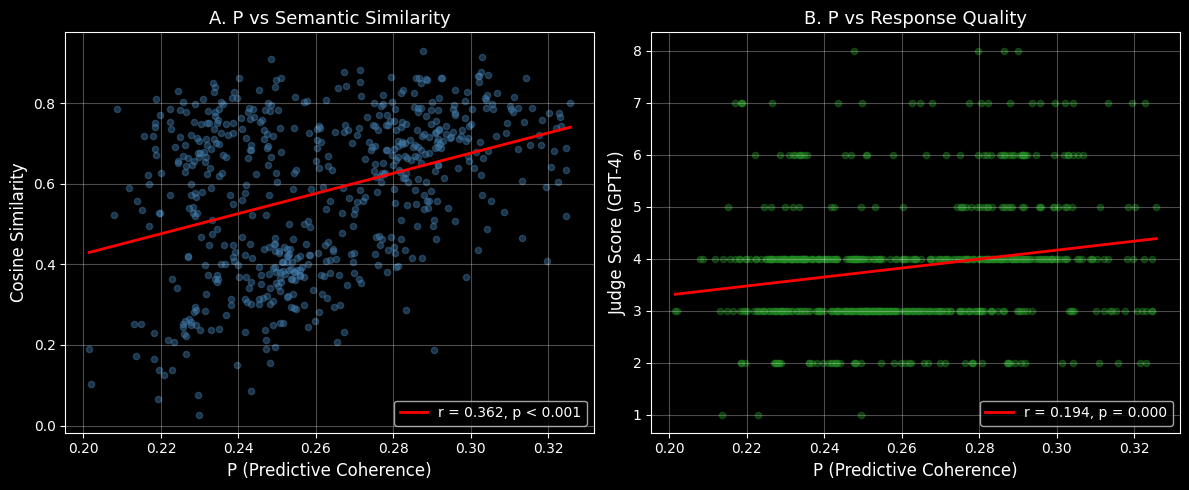

Saved: P_correlations_scatter.png

Panel A: P vs cosine_sim, r = 0.362, p = 0.000000
Panel B: P vs judge_score, r = 0.194, p = 0.000002


In [5]:
# Two-panel scatter plot: P vs Cosine and P vs Judge
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load data
df = pd.read_csv('Test_Logs/Llama_Master_metrics_dec_29.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

# Filter to Test 3, Normal condition
df_plot = df[(df['test_clean'] == '3') & (df['condition'] == 'normal')].dropna(subset=['P', 'cosine_sim', 'score_openai'])

print(f"Plotting {len(df_plot)} turns from Test 3 (Normal)")

# Create figure with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Panel A: P vs Cosine
ax1.scatter(df_plot['P'], df_plot['cosine_sim'], alpha=0.4, s=20, color='steelblue')
# Regression line
slope, intercept, r, p, se = stats.linregress(df_plot['P'], df_plot['cosine_sim'])
x_line = np.linspace(df_plot['P'].min(), df_plot['P'].max(), 100)
ax1.plot(x_line, slope * x_line + intercept, 'r-', linewidth=2, label=f'r = {r:.3f}, p < 0.001')
ax1.set_xlabel('P (Predictive Coherence)', fontsize=12)
ax1.set_ylabel('Cosine Similarity', fontsize=12)
ax1.set_title('A. P vs Semantic Similarity', fontsize=13)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Panel B: P vs Judge Score
ax2.scatter(df_plot['P'], df_plot['score_openai'], alpha=0.4, s=20, color='forestgreen')
# Regression line
slope2, intercept2, r2, p2, se2 = stats.linregress(df_plot['P'], df_plot['score_openai'])
x_line2 = np.linspace(df_plot['P'].min(), df_plot['P'].max(), 100)
ax2.plot(x_line2, slope2 * x_line2 + intercept2, 'r-', linewidth=2, label=f'r = {r2:.3f}, p = {p2:.3f}')
ax2.set_xlabel('P (Predictive Coherence)', fontsize=12)
ax2.set_ylabel('Judge Score (GPT-4)', fontsize=12)
ax2.set_title('B. P vs Response Quality', fontsize=13)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('P_correlations_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: P_correlations_scatter.png")
print(f"\nPanel A: P vs cosine_sim, r = {r:.3f}, p = {p:.6f}")
print(f"Panel B: P vs judge_score, r = {r2:.3f}, p = {p2:.6f}")

In [7]:
# Load and verify updated master data
import pandas as pd

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print(f"Total rows: {len(df)}")
print(f"\nUnique tests: {sorted(df['test_clean'].unique())}")
print(f"\nRows per test:")
print(df['test_clean'].value_counts().sort_index())

print(f"\nPerturbation tests breakdown:")
for test in ['7', '9', '10']:
    df_t = df[df['test_clean'] == test]
    if len(df_t) > 0:
        print(f"\nTest {test}: {len(df_t)} turns")
        print(f"  Teachers: {df_t['teacher'].unique().tolist()}")
        print(f"  Injection turns: {df_t[df_t['injection']==1]['Turn'].unique().tolist()}")

Total rows: 4574

Unique tests: ['1', '10', '2', '3', '4', '6', '7', '8', '9']

Rows per test:
test_clean
1      685
10     300
2      600
3     1200
4      600
6      150
7      315
8      424
9      300
Name: count, dtype: int64

Perturbation tests breakdown:

Test 7: 315 turns
  Teachers: ['claude', 'chatgpt', 'gemini']
  Injection turns: [31, 46, 61, 76, 91]

Test 9: 300 turns
  Teachers: ['claude', 'chatgpt', 'gemini']
  Injection turns: [31, 46, 61, 76, 91]

Test 10: 300 turns
  Teachers: ['chatgpt', 'gemini', 'claude']
  Injection turns: [31, 46, 61, 76, 91]


In [8]:
# Full correlation table with p-values - ALL DATA including Tests 9, 10
import pandas as pd
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for test in sorted(df['test_clean'].unique()):
    for condition in sorted(df['condition'].unique()):
        for teacher in sorted(df['teacher'].unique()):
            df_t = df[(df['test_clean'] == test) & (df['condition'] == condition) & (df['teacher'] == teacher)].dropna(subset=['P', 'Delta', 'cosine_sim', 'score_openai'])

            if len(df_t) < 5:
                continue

            r_p_cos, p_p_cos = stats.pearsonr(df_t['P'], df_t['cosine_sim'])
            r_p_judge, p_p_judge = stats.pearsonr(df_t['P'], df_t['score_openai'])
            r_d_cos, p_d_cos = stats.pearsonr(df_t['Delta'], df_t['cosine_sim'])
            r_d_judge, p_d_judge = stats.pearsonr(df_t['Delta'], df_t['score_openai'])

            results.append({
                'Test': test,
                'Condition': condition,
                'Teacher': teacher,
                'N': len(df_t),
                'P_avg': round(df_t['P'].mean(), 3),
                'Delta_avg': round(df_t['Delta'].mean(), 3),
                'P_vs_cos_r': round(r_p_cos, 3),
                'P_vs_cos_p': round(p_p_cos, 4),
                'P_vs_judge_r': round(r_p_judge, 3),
                'P_vs_judge_p': round(p_p_judge, 4),
                'Delta_vs_cos_r': round(r_d_cos, 3),
                'Delta_vs_cos_p': round(p_d_cos, 4),
                'Delta_vs_judge_r': round(r_d_judge, 3),
                'Delta_vs_judge_p': round(p_d_judge, 4)
            })

results_df = pd.DataFrame(results)
results_df.to_csv('P_Delta_with_pvalues_dec31.csv', index=False)

print("Saved to: P_Delta_with_pvalues_dec31.csv")
print(f"Total combinations: {len(results_df)}")

print(f"\nSIGNIFICANT CORRELATIONS (p < 0.05):")
print(f"  P vs cosine:     {(results_df['P_vs_cos_p'] < 0.05).sum()}/{len(results_df)}")
print(f"  P vs judge:      {(results_df['P_vs_judge_p'] < 0.05).sum()}/{len(results_df)}")
print(f"  Delta vs cosine: {(results_df['Delta_vs_cos_p'] < 0.05).sum()}/{len(results_df)}")
print(f"  Delta vs judge:  {(results_df['Delta_vs_judge_p'] < 0.05).sum()}/{len(results_df)}")

print(f"\nPOSITIVE CORRELATIONS:")
print(f"  P vs cosine:     {(results_df['P_vs_cos_r'] > 0).sum()}/{len(results_df)}")
print(f"  P vs judge:      {(results_df['P_vs_judge_r'] > 0).sum()}/{len(results_df)}")

Saved to: P_Delta_with_pvalues_dec31.csv
Total combinations: 34

SIGNIFICANT CORRELATIONS (p < 0.05):
  P vs cosine:     29/34
  P vs judge:      15/34
  Delta vs cosine: 26/34
  Delta vs judge:  16/34

POSITIVE CORRELATIONS:
  P vs cosine:     32/34
  P vs judge:      20/34


In [9]:
# Full breakdown by test/teacher/condition
import pandas as pd

results_df = pd.read_csv('P_Delta_with_pvalues_dec31.csv')

print("=" * 100)
print("FULL BREAKDOWN: P vs COSINE and P vs JUDGE by TEST/CONDITION/TEACHER")
print("=" * 100)

print(f"\n{'Test':<6} {'Condition':<12} {'Teacher':<10} {'N':<6} {'P_avg':<8} {'P vs cos r':<12} {'P vs cos p':<12} {'P vs judge r':<12} {'P vs judge p':<12}")
print("-" * 100)

for _, row in results_df.iterrows():
    print(f"{row['Test']:<6} {row['Condition']:<12} {row['Teacher']:<10} {row['N']:<6} {row['P_avg']:<8} {row['P_vs_cos_r']:<12} {row['P_vs_cos_p']:<12} {row['P_vs_judge_r']:<12} {row['P_vs_judge_p']:<12}")

print("-" * 100)
print(f"\nTOTAL COMBINATIONS: {len(results_df)}")
print(f"TOTAL TURNS: {results_df['N'].sum()}")

FULL BREAKDOWN: P vs COSINE and P vs JUDGE by TEST/CONDITION/TEACHER

Test   Condition    Teacher    N      P_avg    P vs cos r   P vs cos p   P vs judge r P vs judge p
----------------------------------------------------------------------------------------------------
1      constrained  chatgpt    100    0.244    0.165        0.1018       0.059        0.5566      
1      constrained  claude     150    0.277    0.226        0.0054       -0.241       0.003       
1      constrained  gemini     150    0.282    0.414        0.0          -0.166       0.042       
1      normal       chatgpt    100    0.24     0.361        0.0002       -0.084       0.4071      
1      normal       claude     100    0.269    0.398        0.0          0.06         0.5499      
1      normal       gemini     85     0.261    0.429        0.0          0.327        0.0022      
10     normal       chatgpt    100    0.267    0.237        0.0174       0.141        0.1612      
10     normal       claude     100   

In [10]:
# Summary by TEST only
import pandas as pd

results_df = pd.read_csv('P_Delta_with_pvalues_dec31.csv')

print("=" * 80)
print("SUMMARY BY TEST")
print("=" * 80)

summary = results_df.groupby('Test').agg({
    'N': 'sum',
    'P_avg': 'mean',
    'P_vs_cos_r': 'mean',
    'P_vs_judge_r': 'mean'
}).round(3)

summary['P_cos_significant'] = results_df.groupby('Test').apply(lambda x: (x['P_vs_cos_p'] < 0.05).sum()).values
summary['P_cos_positive'] = results_df.groupby('Test').apply(lambda x: (x['P_vs_cos_r'] > 0).sum()).values
summary['combinations'] = results_df.groupby('Test').size().values

summary.to_csv('P_summary_by_test.csv')
print(summary)
print("\nSaved to: P_summary_by_test.csv")

SUMMARY BY TEST
         N  P_avg  P_vs_cos_r  P_vs_judge_r  P_cos_significant  \
Test                                                             
1      685  0.262       0.332        -0.007                  5   
2      600  0.282       0.139        -0.176                  5   
3     1197  0.269       0.316        -0.042                  5   
4      600  0.293       0.108         0.028                  2   
6      150  0.252       0.078        -0.033                  0   
7      315  0.287       0.695         0.373                  3   
8      424  0.282       0.311         0.068                  3   
9      300  0.276       0.518         0.370                  3   
10     300  0.275       0.441         0.333                  3   

      P_cos_positive  combinations  
Test                                
1                  6             6  
2                  5             6  
3                  6             6  
4                  2             3  
6                  1             1 

/var/folders/dl/20n4dc5s195czvrf9wd7krrm0000gn/T/ipykernel_48367/3370754718.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary['P_cos_significant'] = results_df.groupby('Test').apply(lambda x: (x['P_vs_cos_p'] < 0.05).sum()).values
/var/folders/dl/20n4dc5s195czvrf9wd7krrm0000gn/T/ipykernel_48367/3370754718.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary['P_cos_positive'] = results_df.groupby('T

In [11]:
# Perturbation Analysis Step 1: P drop by test and teacher
import pandas as pd
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print("=" * 90)
print("PERTURBATION ANALYSIS: P AND Hb AT INJECTION")
print("=" * 90)

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}

results = []

for test in ['7', '9', '10']:
    for teacher in sorted(df['teacher'].unique()):
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)]

        if len(df_t) == 0:
            continue

        baseline = df_t[df_t['Turn'] <= 30]
        injection = df_t[df_t['injection'] == 1]

        p_base = baseline['P'].mean()
        p_inj = injection['P'].mean()
        p_drop = ((p_inj - p_base) / p_base) * 100

        hb_base = baseline['Hb'].mean()
        hb_inj = injection['Hb'].mean()
        hb_change = ((hb_inj - hb_base) / hb_base) * 100

        # t-test for P
        t_stat, p_val = stats.ttest_ind(baseline['P'], injection['P'])

        results.append({
            'Test': test,
            'Type': test_labels[test],
            'Teacher': teacher,
            'P_baseline': round(p_base, 3),
            'P_injection': round(p_inj, 3),
            'P_drop_%': round(p_drop, 1),
            'Hb_baseline': round(hb_base, 3),
            'Hb_injection': round(hb_inj, 3),
            'Hb_change_%': round(hb_change, 1),
            't_stat': round(t_stat, 2),
            'p_value': round(p_val, 4),
            'Significant': 'Yes' if p_val < 0.05 else 'No'
        })

results_df = pd.DataFrame(results)
results_df.to_csv('Perturbation_analysis_step1.csv', index=False)

print(results_df.to_string(index=False))
print("\nSaved to: Perturbation_analysis_step1.csv")

PERTURBATION ANALYSIS: P AND Hb AT INJECTION
Test          Type Teacher  P_baseline  P_injection  P_drop_%  Hb_baseline  Hb_injection  Hb_change_%  t_stat  p_value Significant
   7 Contradiction chatgpt       0.290        0.203     -30.0        2.284         4.970        117.5    8.67   0.0000         Yes
   7 Contradiction  claude       0.312        0.199     -36.3        1.688         5.296        213.8   14.47   0.0000         Yes
   7 Contradiction  gemini       0.285        0.203     -28.8        2.530         5.077        100.7    7.46   0.0000         Yes
   9   Topic Shift chatgpt       0.272        0.247      -9.2        2.739         3.954         44.4    3.93   0.0004         Yes
   9   Topic Shift  claude       0.302        0.239     -20.8        2.148         4.398        104.7   15.18   0.0000         Yes
   9   Topic Shift  gemini       0.274        0.243     -11.1        2.824         4.292         52.0    3.25   0.0027         Yes
  10  Non-Sequitur chatgpt       0.268

In [12]:
# Perturbation Analysis Step 2: Compare P, cosine, judge drops
import pandas as pd
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print("=" * 100)
print("PERTURBATION ANALYSIS: P vs COSINE vs JUDGE DROP AT INJECTION")
print("=" * 100)

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}

results = []

for test in ['7', '9', '10']:
    for teacher in sorted(df['teacher'].unique()):
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)]

        if len(df_t) == 0:
            continue

        baseline = df_t[df_t['Turn'] <= 30]
        injection = df_t[df_t['injection'] == 1]

        # P
        p_base = baseline['P'].mean()
        p_inj = injection['P'].mean()
        p_drop = ((p_inj - p_base) / p_base) * 100

        # Cosine
        cos_base = baseline['cosine_sim'].mean()
        cos_inj = injection['cosine_sim'].mean()
        cos_drop = ((cos_inj - cos_base) / cos_base) * 100

        # Judge
        judge_base = baseline['score_openai'].mean()
        judge_inj = injection['score_openai'].mean()
        judge_drop = ((judge_inj - judge_base) / judge_base) * 100

        results.append({
            'Test': test,
            'Type': test_labels[test],
            'Teacher': teacher,
            'P_drop_%': round(p_drop, 1),
            'Cosine_drop_%': round(cos_drop, 1),
            'Judge_drop_%': round(judge_drop, 1),
            'P_baseline': round(p_base, 3),
            'Cosine_baseline': round(cos_base, 3),
            'Judge_baseline': round(judge_base, 2)
        })

results_df = pd.DataFrame(results)
results_df.to_csv('Perturbation_analysis_step2.csv', index=False)

print(results_df[['Test', 'Type', 'Teacher', 'P_drop_%', 'Cosine_drop_%', 'Judge_drop_%']].to_string(index=False))
print("\nSaved to: Perturbation_analysis_step2.csv")

# Summary by test type
print("\n" + "=" * 60)
print("AVERAGE DROP BY INJECTION TYPE")
print("=" * 60)
summary = results_df.groupby('Type')[['P_drop_%', 'Cosine_drop_%', 'Judge_drop_%']].mean().round(1)
print(summary)

PERTURBATION ANALYSIS: P vs COSINE vs JUDGE DROP AT INJECTION
Test          Type Teacher  P_drop_%  Cosine_drop_%  Judge_drop_%
   7 Contradiction chatgpt     -30.0          -94.1         -54.1
   7 Contradiction  claude     -36.3          -84.8         -33.7
   7 Contradiction  gemini     -28.8         -100.6         -45.9
   9   Topic Shift chatgpt      -9.2          -80.8         -76.9
   9   Topic Shift  claude     -20.8          -92.1         -77.6
   9   Topic Shift  gemini     -11.1          -97.6         -79.9
  10  Non-Sequitur chatgpt      -7.3          -98.4         -77.6
  10  Non-Sequitur  claude     -20.4          -96.5         -75.5
  10  Non-Sequitur  gemini     -11.5          -93.6         -77.6

Saved to: Perturbation_analysis_step2.csv

AVERAGE DROP BY INJECTION TYPE
               P_drop_%  Cosine_drop_%  Judge_drop_%
Type                                                
Contradiction     -31.7          -93.2         -44.6
Non-Sequitur      -13.1          -96.2      

In [13]:
# Perturbation Analysis Step 3: Recovery dynamics
import pandas as pd
import numpy as np

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print("=" * 90)
print("RECOVERY DYNAMICS: P VALUE AFTER INJECTION")
print("=" * 90)

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}
injection_turns = [31, 46, 61, 76, 91]

results = []

for test in ['7', '9', '10']:
    for teacher in sorted(df['teacher'].unique()):
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)].sort_values('Turn')

        if len(df_t) == 0:
            continue

        # Baseline P
        baseline = df_t[df_t['Turn'] <= 30]
        p_baseline = baseline['P'].mean()

        # P at injection
        injection = df_t[df_t['injection'] == 1]
        p_injection = injection['P'].mean()

        # Recovery: 1 turn after injection
        recovery_1 = df_t[df_t['Turn'].isin([32, 47, 62, 77, 92])]
        p_recovery_1 = recovery_1['P'].mean() if len(recovery_1) > 0 else np.nan

        # Recovery: 2 turns after injection
        recovery_2 = df_t[df_t['Turn'].isin([33, 48, 63, 78, 93])]
        p_recovery_2 = recovery_2['P'].mean() if len(recovery_2) > 0 else np.nan

        # Recovery: 3 turns after injection
        recovery_3 = df_t[df_t['Turn'].isin([34, 49, 64, 79, 94])]
        p_recovery_3 = recovery_3['P'].mean() if len(recovery_3) > 0 else np.nan

        # Calculate % recovery (100% = back to baseline)
        p_drop = p_baseline - p_injection
        recovery_1_pct = ((p_recovery_1 - p_injection) / p_drop) * 100 if p_drop != 0 else 0
        recovery_2_pct = ((p_recovery_2 - p_injection) / p_drop) * 100 if p_drop != 0 else 0
        recovery_3_pct = ((p_recovery_3 - p_injection) / p_drop) * 100 if p_drop != 0 else 0

        results.append({
            'Test': test,
            'Type': test_labels[test],
            'Teacher': teacher,
            'P_baseline': round(p_baseline, 3),
            'P_injection': round(p_injection, 3),
            'P_turn+1': round(p_recovery_1, 3),
            'P_turn+2': round(p_recovery_2, 3),
            'P_turn+3': round(p_recovery_3, 3),
            'Recovery_1_turn_%': round(recovery_1_pct, 1),
            'Recovery_2_turns_%': round(recovery_2_pct, 1),
            'Recovery_3_turns_%': round(recovery_3_pct, 1)
        })

results_df = pd.DataFrame(results)
results_df.to_csv('Perturbation_analysis_step3_recovery.csv', index=False)

print(results_df[['Test', 'Type', 'Teacher', 'P_baseline', 'P_injection', 'P_turn+1', 'P_turn+2', 'P_turn+3']].to_string(index=False))

print("\n" + "=" * 60)
print("AVERAGE % RECOVERY BY INJECTION TYPE")
print("=" * 60)
summary = results_df.groupby('Type')[['Recovery_1_turn_%', 'Recovery_2_turns_%', 'Recovery_3_turns_%']].mean().round(1)
print(summary)

print("\nSaved to: Perturbation_analysis_step3_recovery.csv")

RECOVERY DYNAMICS: P VALUE AFTER INJECTION
Test          Type Teacher  P_baseline  P_injection  P_turn+1  P_turn+2  P_turn+3
   7 Contradiction chatgpt       0.290        0.203     0.274     0.286     0.291
   7 Contradiction  claude       0.312        0.199     0.304     0.306     0.309
   7 Contradiction  gemini       0.285        0.203     0.283     0.276     0.281
   9   Topic Shift chatgpt       0.272        0.247     0.264     0.258     0.276
   9   Topic Shift  claude       0.302        0.239     0.290     0.283     0.299
   9   Topic Shift  gemini       0.274        0.243     0.273     0.256     0.257
  10  Non-Sequitur chatgpt       0.268        0.249     0.279     0.271     0.269
  10  Non-Sequitur  claude       0.303        0.242     0.294     0.302     0.300
  10  Non-Sequitur  gemini       0.275        0.243     0.264     0.274     0.266

AVERAGE % RECOVERY BY INJECTION TYPE
               Recovery_1_turn_%  Recovery_2_turns_%  Recovery_3_turns_%
Type                      

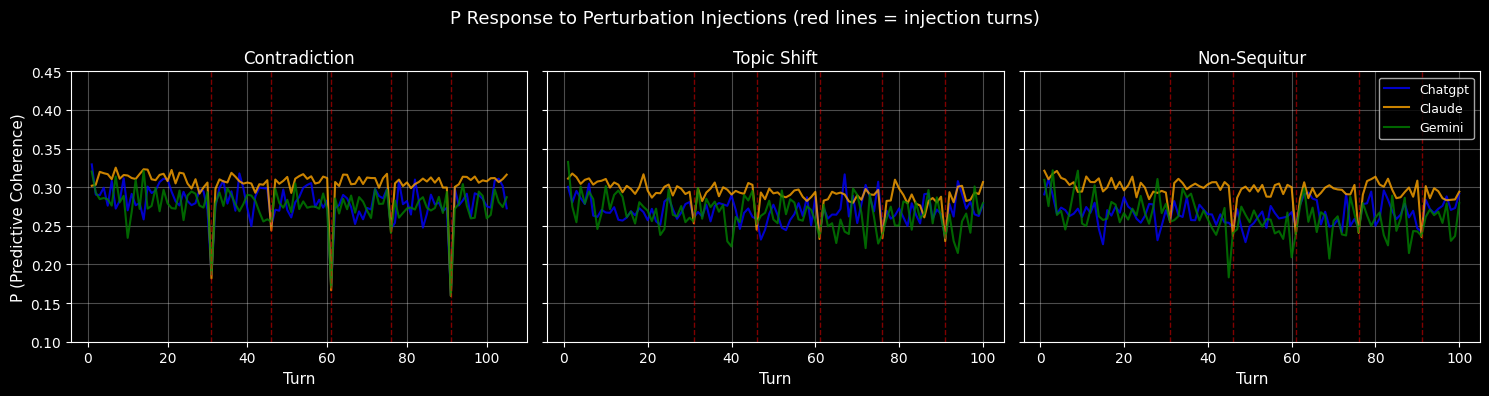

Saved: Perturbation_P_trajectory.png


In [14]:
# Visualization: P trajectory for all 3 perturbation tests
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}
injection_turns = [31, 46, 61, 76, 91]
colors = {'chatgpt': 'blue', 'claude': 'orange', 'gemini': 'green'}

for idx, test in enumerate(['7', '9', '10']):
    ax = axes[idx]

    for teacher in ['chatgpt', 'claude', 'gemini']:
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)].sort_values('Turn')
        ax.plot(df_t['Turn'], df_t['P'], label=teacher.capitalize(), color=colors[teacher], linewidth=1.5, alpha=0.8)

    # Mark injection points
    for inj in injection_turns:
        ax.axvline(x=inj, color='red', linestyle='--', alpha=0.5, linewidth=1)

    ax.set_xlabel('Turn', fontsize=11)
    ax.set_title(f'{test_labels[test]}', fontsize=12)
    ax.set_ylim(0.1, 0.45)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        ax.set_ylabel('P (Predictive Coherence)', fontsize=11)
    if idx == 2:
        ax.legend(loc='upper right', fontsize=9)

plt.suptitle('P Response to Perturbation Injections (red lines = injection turns)', fontsize=13)
plt.tight_layout()
plt.savefig('Perturbation_P_trajectory.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: Perturbation_P_trajectory.png")

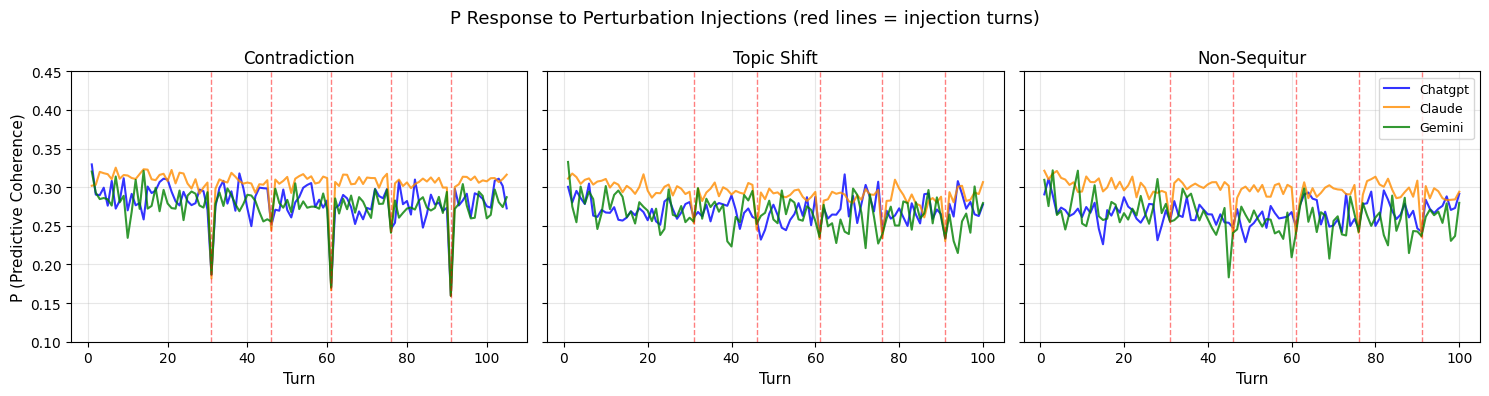

Saved: Perturbation_P_trajectory_white.png


In [15]:
# Visualization: P trajectory with white background
import pandas as pd
import matplotlib.pyplot as plt

# Set white background style
plt.style.use('default')

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.patch.set_facecolor('white')

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}
injection_turns = [31, 46, 61, 76, 91]
colors = {'chatgpt': 'blue', 'claude': 'darkorange', 'gemini': 'green'}

for idx, test in enumerate(['7', '9', '10']):
    ax = axes[idx]
    ax.set_facecolor('white')

    for teacher in ['chatgpt', 'claude', 'gemini']:
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)].sort_values('Turn')
        ax.plot(df_t['Turn'], df_t['P'], label=teacher.capitalize(), color=colors[teacher], linewidth=1.5, alpha=0.8)

    # Mark injection points
    for inj in injection_turns:
        ax.axvline(x=inj, color='red', linestyle='--', alpha=0.5, linewidth=1)

    ax.set_xlabel('Turn', fontsize=11)
    ax.set_title(f'{test_labels[test]}', fontsize=12)
    ax.set_ylim(0.1, 0.45)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        ax.set_ylabel('P (Predictive Coherence)', fontsize=11)
    if idx == 2:
        ax.legend(loc='upper right', fontsize=9)

plt.suptitle('P Response to Perturbation Injections (red lines = injection turns)', fontsize=13)
plt.tight_layout()
plt.savefig('Perturbation_P_trajectory_white.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Saved: Perturbation_P_trajectory_white.png")

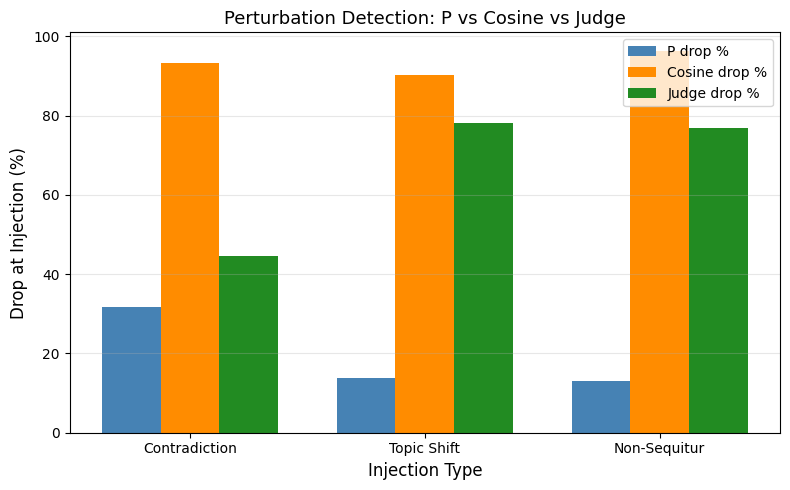

Saved: Perturbation_drop_comparison.png


In [17]:
# Bar chart: P drop % by injection type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')

# Data from step 2
data = {
    'Type': ['Contradiction', 'Topic Shift', 'Non-Sequitur'],
    'P_drop': [31.7, 13.7, 13.1],
    'Cosine_drop': [93.2, 90.2, 96.2],
    'Judge_drop': [44.6, 78.1, 76.9]
}

df_plot = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

x = np.arange(len(df_plot['Type']))
width = 0.25

bars1 = ax.bar(x - width, df_plot['P_drop'], width, label='P drop %', color='steelblue')
bars2 = ax.bar(x, df_plot['Cosine_drop'], width, label='Cosine drop %', color='darkorange')
bars3 = ax.bar(x + width, df_plot['Judge_drop'], width, label='Judge drop %', color='forestgreen')

ax.set_ylabel('Drop at Injection (%)', fontsize=12)
ax.set_xlabel('Injection Type', fontsize=12)
ax.set_title('Perturbation Detection: P vs Cosine vs Judge', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(df_plot['Type'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('Perturbation_drop_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Saved: Perturbation_drop_comparison.png")

In [18]:
# Detection table: P, Cosine, Judge - all with significance
import pandas as pd
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}

results = []

for test in ['7', '9', '10']:
    for teacher in sorted(df['teacher'].unique()):
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)]

        if len(df_t) == 0:
            continue

        baseline = df_t[df_t['Turn'] <= 30]
        injection = df_t[df_t['injection'] == 1]

        # P
        t_p, p_p = stats.ttest_ind(baseline['P'], injection['P'])
        p_detected = 'Yes' if p_p < 0.05 else 'No'

        # Cosine
        t_cos, p_cos = stats.ttest_ind(baseline['cosine_sim'], injection['cosine_sim'])
        cos_detected = 'Yes' if p_cos < 0.05 else 'No'

        # Judge
        t_judge, p_judge = stats.ttest_ind(baseline['score_openai'], injection['score_openai'])
        judge_detected = 'Yes' if p_judge < 0.05 else 'No'

        results.append({
            'Test': test,
            'Type': test_labels[test],
            'Teacher': teacher.capitalize(),
            'P_detected': p_detected,
            'P_pvalue': round(p_p, 4),
            'Cosine_detected': cos_detected,
            'Cosine_pvalue': round(p_cos, 4),
            'Judge_detected': judge_detected,
            'Judge_pvalue': round(p_judge, 4)
        })

results_df = pd.DataFrame(results)
results_df.to_csv('Perturbation_detection_summary.csv', index=False)

print("=" * 80)
print("PERTURBATION DETECTION SUMMARY (p < 0.05)")
print("=" * 80)
print(results_df[['Type', 'Teacher', 'P_detected', 'Cosine_detected', 'Judge_detected']].to_string(index=False))

# Summary counts
print("\n" + "=" * 40)
print("DETECTION COUNTS (out of 9)")
print("=" * 40)
print(f"P:      {(results_df['P_detected'] == 'Yes').sum()}/9")
print(f"Cosine: {(results_df['Cosine_detected'] == 'Yes').sum()}/9")
print(f"Judge:  {(results_df['Judge_detected'] == 'Yes').sum()}/9")

print("\nSaved to: Perturbation_detection_summary.csv")

PERTURBATION DETECTION SUMMARY (p < 0.05)
         Type Teacher P_detected Cosine_detected Judge_detected
Contradiction Chatgpt        Yes             Yes            Yes
Contradiction  Claude        Yes             Yes            Yes
Contradiction  Gemini        Yes             Yes            Yes
  Topic Shift Chatgpt        Yes             Yes            Yes
  Topic Shift  Claude        Yes             Yes            Yes
  Topic Shift  Gemini        Yes             Yes            Yes
 Non-Sequitur Chatgpt        Yes             Yes            Yes
 Non-Sequitur  Claude        Yes             Yes            Yes
 Non-Sequitur  Gemini        Yes             Yes            Yes

DETECTION COUNTS (out of 9)
P:      9/9
Cosine: 9/9
Judge:  9/9

Saved to: Perturbation_detection_summary.csv


/Users/whafez/Library/CloudStorage/Dropbox/08 Development/LLM_Project/.venv/lib/python3.14/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
# Simplified detection table: by Teacher only
import pandas as pd
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for teacher in sorted(df['teacher'].unique()):
    # Combine all perturbation tests (7, 9, 10) for this teacher
    df_t = df[(df['test_clean'].isin(['7', '9', '10'])) & (df['teacher'] == teacher)]

    baseline = df_t[df_t['Turn'] <= 30]
    injection = df_t[df_t['injection'] == 1]

    # P
    t_p, p_p = stats.ttest_ind(baseline['P'], injection['P'])

    # Cosine
    t_cos, p_cos = stats.ttest_ind(baseline['cosine_sim'], injection['cosine_sim'])

    # Judge
    t_judge, p_judge = stats.ttest_ind(baseline['score_openai'], injection['score_openai'])

    results.append({
        'Teacher': teacher.capitalize(),
        'P_detected': 'Yes' if p_p < 0.05 else 'No',
        'P_pvalue': round(p_p, 4),
        'Cosine_detected': 'Yes' if p_cos < 0.05 else 'No',
        'Cosine_pvalue': round(p_cos, 4),
        'Judge_detected': 'Yes' if p_judge < 0.05 else 'No',
        'Judge_pvalue': round(p_judge, 4)
    })

results_df = pd.DataFrame(results)
results_df.to_csv('Perturbation_detection_by_teacher.csv', index=False)

print("=" * 70)
print("PERTURBATION DETECTION BY TEACHER (p < 0.05)")
print("=" * 70)
print(f"\n{'Teacher':<12} {'P':<15} {'Cosine':<15} {'Judge':<15}")
print("-" * 55)

for _, row in results_df.iterrows():
    p_str = f"Yes (p={row['P_pvalue']})" if row['P_detected'] == 'Yes' else 'No'
    cos_str = f"Yes (p={row['Cosine_pvalue']})" if row['Cosine_detected'] == 'Yes' else 'No'
    judge_str = f"Yes (p={row['Judge_pvalue']})" if row['Judge_detected'] == 'Yes' else 'No'
    print(f"{row['Teacher']:<12} {p_str:<15} {cos_str:<15} {judge_str:<15}")

print("\nSaved to: Perturbation_detection_by_teacher.csv")

PERTURBATION DETECTION BY TEACHER (p < 0.05)

Teacher      P               Cosine          Judge          
-------------------------------------------------------
Chatgpt      Yes (p=0.0)     Yes (p=0.0)     Yes (p=0.0)    
Claude       Yes (p=0.0)     Yes (p=0.0)     Yes (p=0.0)    
Gemini       Yes (p=0.0)     Yes (p=0.0)     Yes (p=0.0)    

Saved to: Perturbation_detection_by_teacher.csv


In [20]:
# Detection table with Delta H added
import pandas as pd
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

results = []

for teacher in sorted(df['teacher'].unique()):
    df_t = df[(df['test_clean'].isin(['7', '9', '10'])) & (df['teacher'] == teacher)]

    baseline = df_t[df_t['Turn'] <= 30]
    injection = df_t[df_t['injection'] == 1]

    # P
    t_p, p_p = stats.ttest_ind(baseline['P'], injection['P'])

    # Delta
    t_d, p_d = stats.ttest_ind(baseline['Delta'], injection['Delta'])

    # Cosine
    t_cos, p_cos = stats.ttest_ind(baseline['cosine_sim'], injection['cosine_sim'])

    # Judge
    t_judge, p_judge = stats.ttest_ind(baseline['score_openai'], injection['score_openai'])

    results.append({
        'Teacher': teacher.capitalize(),
        'P': f"Yes (p<0.001)" if p_p < 0.001 else f"Yes (p={round(p_p,3)})" if p_p < 0.05 else "No",
        'Delta_H': f"Yes (p<0.001)" if p_d < 0.001 else f"Yes (p={round(p_d,3)})" if p_d < 0.05 else "No",
        'Cosine': f"Yes (p<0.001)" if p_cos < 0.001 else f"Yes (p={round(p_cos,3)})" if p_cos < 0.05 else "No",
        'Judge': f"Yes (p<0.001)" if p_judge < 0.001 else f"Yes (p={round(p_judge,3)})" if p_judge < 0.05 else "No"
    })

results_df = pd.DataFrame(results)
results_df.to_csv('Perturbation_detection_with_delta.csv', index=False)

print("=" * 75)
print("PERTURBATION DETECTION BY TEACHER (p < 0.05)")
print("=" * 75)
print(f"\n{'Teacher':<12} {'P':<16} {'Delta_H':<16} {'Cosine':<16} {'Judge':<16}")
print("-" * 75)

for _, row in results_df.iterrows():
    print(f"{row['Teacher']:<12} {row['P']:<16} {row['Delta_H']:<16} {row['Cosine']:<16} {row['Judge']:<16}")

print("\nSaved to: Perturbation_detection_with_delta.csv")

PERTURBATION DETECTION BY TEACHER (p < 0.05)

Teacher      P                Delta_H          Cosine           Judge           
---------------------------------------------------------------------------
Chatgpt      Yes (p<0.001)    Yes (p<0.001)    Yes (p<0.001)    Yes (p<0.001)   
Claude       Yes (p<0.001)    Yes (p<0.001)    Yes (p<0.001)    Yes (p<0.001)   
Gemini       Yes (p<0.001)    Yes (p<0.001)    Yes (p<0.001)    Yes (p<0.001)   

Saved to: Perturbation_detection_with_delta.csv


In [22]:
# Effect sizes (Cohen's d) and Confidence Intervals
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

# ============================================
# 1. COHEN'S D FOR PERTURBATION DETECTION
# ============================================
print("=" * 80)
print("EFFECT SIZES (Cohen's d) FOR PERTURBATION DETECTION")
print("=" * 80)

def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

test_labels = {'7': 'Contradiction', '9': 'Topic Shift', '10': 'Non-Sequitur'}

effect_results = []

for test in ['7', '9', '10']:
    for teacher in sorted(df['teacher'].unique()):
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)]

        if len(df_t) == 0:
            continue

        baseline = df_t[df_t['Turn'] <= 30]
        injection = df_t[df_t['injection'] == 1]

        d_P = cohens_d(baseline['P'], injection['P'])
        d_Delta = cohens_d(baseline['Delta'], injection['Delta'])
        d_cos = cohens_d(baseline['cosine_sim'], injection['cosine_sim'])
        d_judge = cohens_d(baseline['score_openai'], injection['score_openai'])

        effect_results.append({
            'Test': test,
            'Type': test_labels[test],
            'Teacher': teacher.capitalize(),
            'd_P': round(d_P, 2),
            'd_Delta': round(d_Delta, 2),
            'd_Cosine': round(d_cos, 2),
            'd_Judge': round(d_judge, 2)
        })

effect_df = pd.DataFrame(effect_results)
print(f"\n{'Type':<15} {'Teacher':<10} {'d_P':<8} {'d_Delta':<10} {'d_Cosine':<10} {'d_Judge':<10}")
print("-" * 65)
for _, row in effect_df.iterrows():
    print(f"{row['Type']:<15} {row['Teacher']:<10} {row['d_P']:<8} {row['d_Delta']:<10} {row['d_Cosine']:<10} {row['d_Judge']:<10}")

print("\nInterpretation: |d| > 0.8 = large, 0.5-0.8 = medium, 0.2-0.5 = small")

# ============================================
# 2. CONFIDENCE INTERVALS FOR CORRELATIONS
# ============================================
print("\n" + "=" * 80)
print("95% CONFIDENCE INTERVALS FOR P vs COSINE CORRELATION")
print("=" * 80)

def r_confidence_interval(r, n, alpha=0.05):
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)
    ci_low = np.tanh(z - z_crit * se)
    ci_high = np.tanh(z + z_crit * se)
    return ci_low, ci_high

ci_results = []

for test in sorted(df['test_clean'].unique()):
    for teacher in sorted(df['teacher'].unique()):
        df_t = df[(df['test_clean'] == test) & (df['teacher'] == teacher)].dropna(subset=['P', 'cosine_sim'])

        if len(df_t) < 10:
            continue

        r = df_t['P'].corr(df_t['cosine_sim'])
        n = len(df_t)
        ci_low, ci_high = r_confidence_interval(r, n)

        ci_results.append({
            'Test': test,
            'Teacher': teacher.capitalize(),
            'N': n,
            'r': round(r, 3),
            'CI_low': round(ci_low, 3),
            'CI_high': round(ci_high, 3)
        })

ci_df = pd.DataFrame(ci_results)
ci_df.to_csv('Correlation_CI.csv', index=False)

print(f"\n{'Test':<6} {'Teacher':<10} {'N':<6} {'r':<8} {'95% CI':<20}")
print("-" * 55)
for _, row in ci_df.iterrows():
    print(f"{row['Test']:<6} {row['Teacher']:<10} {row['N']:<6} {row['r']:<8} [{row['CI_low']}, {row['CI_high']}]")

# Save effect sizes
effect_df.to_csv('Effect_sizes_cohens_d.csv', index=False)

print("\nSaved: Effect_sizes_cohens_d.csv")
print("Saved: Correlation_CI.csv")

EFFECT SIZES (Cohen's d) FOR PERTURBATION DETECTION

Type            Teacher    d_P      d_Delta    d_Cosine   d_Judge   
-----------------------------------------------------------------
Contradiction   Chatgpt    4.19     4.07       7.69       2.36      
Contradiction   Claude     6.99     6.82       9.25       2.22      
Contradiction   Gemini     3.6      3.46       7.14       2.25      
Topic Shift     Chatgpt    1.9      2.36       4.28       3.2       
Topic Shift     Claude     7.33     4.84       6.83       4.51      
Topic Shift     Gemini     1.57     1.92       3.35       2.39      
Non-Sequitur    Chatgpt    1.26     1.7        6.52       2.83      
Non-Sequitur    Claude     6.48     4.28       6.89       3.3       
Non-Sequitur    Gemini     1.59     1.72       4.45       2.54      

Interpretation: |d| > 0.8 = large, 0.5-0.8 = medium, 0.2-0.5 = small

95% CONFIDENCE INTERVALS FOR P vs COSINE CORRELATION

Test   Teacher    N      r        95% CI              
-----------

In [1]:
# Absolute P values across tests, teachers, conditions
import pandas as pd

df = pd.read_csv('Llama_Master_metrics_dec_31.csv')
df['test_clean'] = df['test'].astype(str).str.strip().str.replace(',', '')

print("=" * 70)
print("ABSOLUTE P VALUES ACROSS TESTS")
print("=" * 70)

# By test
print("\nMean P by Test:")
print("-" * 40)
test_summary = df.groupby('test_clean')['P'].agg(['mean', 'std', 'count']).round(3)
test_summary.columns = ['Mean P', 'Std', 'N']
print(test_summary)

# By teacher
print("\n" + "=" * 70)
print("Mean P by Teacher:")
print("-" * 40)
teacher_summary = df.groupby('teacher')['P'].agg(['mean', 'std', 'count']).round(3)
teacher_summary.columns = ['Mean P', 'Std', 'N']
print(teacher_summary)

# By condition
print("\n" + "=" * 70)
print("Mean P by Condition:")
print("-" * 40)
condition_summary = df.groupby('condition')['P'].agg(['mean', 'std', 'count']).round(3)
condition_summary.columns = ['Mean P', 'Std', 'N']
print(condition_summary)

# By test type (baseline vs perturbation)
print("\n" + "=" * 70)
print("Mean P by Test Type:")
print("-" * 40)
df['test_type'] = df['test_clean'].apply(lambda x: 'Perturbation' if x in ['7', '9', '10'] else 'Baseline')
type_summary = df.groupby('test_type')['P'].agg(['mean', 'std', 'count']).round(3)
type_summary.columns = ['Mean P', 'Std', 'N']
print(type_summary)

# Overall
print("\n" + "=" * 70)
print("Overall P Statistics:")
print("-" * 40)
print(f"Mean: {df['P'].mean():.3f}")
print(f"Std:  {df['P'].std():.3f}")
print(f"Min:  {df['P'].min():.3f}")
print(f"Max:  {df['P'].max():.3f}")
print(f"N:    {len(df)}")

# Save summary
summary_df = df.groupby(['test_clean', 'condition', 'teacher'])['P'].agg(['mean', 'std', 'count']).round(3).reset_index()
summary_df.to_csv('P_absolute_values_summary.csv', index=False)
print("\nSaved to: P_absolute_values_summary.csv")

ABSOLUTE P VALUES ACROSS TESTS

Mean P by Test:
----------------------------------------
            Mean P    Std     N
test_clean                     
1            0.265  0.028   685
10           0.275  0.024   300
2            0.282  0.031   600
3            0.269  0.028  1200
4            0.293  0.019   600
6            0.252  0.039   150
7            0.287  0.027   315
8            0.282  0.019   424
9            0.276  0.021   300

Mean P by Teacher:
----------------------------------------
         Mean P    Std     N
teacher                     
chatgpt   0.259  0.027  1455
claude    0.294  0.020  1505
gemini    0.274  0.027  1614

Mean P by Condition:
----------------------------------------
             Mean P    Std     N
condition                       
constrained   0.275  0.030  1450
normal        0.277  0.028  3124

Mean P by Test Type:
----------------------------------------
              Mean P    Std     N
test_type                        
Baseline       0.275  0.029